# 💧 **2. Modelado datos tabulares** 💧

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.17.1


In [ ]:
import pandas as pd
import numpy as np

# Cargar el fd_train_finpreprocesado.csv

fd_train_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_train_finpreprocesado.csv", sep=';')


# Cargar el fd_val_finpreprocesado.csv

fd_val_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_val_finpreprocesado.csv", sep=';')

# Cargar el fd_test_finpreprocesado.csv

fd_test_finpreprocesado = pd.read_csv("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/fd_test_finpreprocesado.csv", sep=';')


In [ ]:
#shape de cada conjunto
print("Shape en train:", fd_train_finpreprocesado.shape)
print("Shape en val:", fd_val_finpreprocesado.shape)
print("Shape en test:", fd_test_finpreprocesado.shape)


# Revisar estadísticas básicas
print("Estadísticas de train:", fd_train_finpreprocesado.describe())
print("Estadísticas de val:", fd_val_finpreprocesado.describe())
print("Estadísticas de test:", fd_test_finpreprocesado.describe())


Shape en train: (2110, 33)
Shape en val: (373, 33)
Shape en test: (622, 33)
Estadísticas de train:        host_response_time  host_response_rate  host_acceptance_rate  \
count         2110.000000         2110.000000           2110.000000   
mean             2.750711            0.961455              0.896447   
std              0.578119            0.114991              0.191800   
min              0.000000            0.000000              0.000000   
25%              3.000000            0.980000              0.870024   
50%              3.000000            1.000000              0.980000   
75%              3.000000            1.000000              1.000000   
max              3.000000            1.000000              1.000000   

       host_is_superhost  host_total_listings_count  host_has_profile_pic  \
count        2110.000000                2110.000000           2110.000000   
mean            0.334123                   3.112970              0.990047   
std             0.471795      

##**Dividir los datos en X (features) e y (target)**
**Columna objetivo: 'price'**

In [ ]:
import numpy as np
import pandas as pd

# Ruta base en Google Drive
base_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/"

# 🔹 Cargar los DataFrames finales procesados
fd_train_finpreprocesado = pd.read_csv(base_path + "fd_train_finpreprocesado.csv", sep=';')
fd_val_finpreprocesado = pd.read_csv(base_path + "fd_val_finpreprocesado.csv", sep=';')
fd_test_finpreprocesado = pd.read_csv(base_path + "fd_test_finpreprocesado.csv", sep=';')

# 🔹 Guardar Features (X) tabulares SIN 'price'
X_train_tab = fd_train_finpreprocesado.drop(columns=["price"])
X_val_tab = fd_val_finpreprocesado.drop(columns=["price"])
X_test_tab = fd_test_finpreprocesado.drop(columns=["price"])

X_train_tab.to_csv(base_path + "X_train_tab.csv", sep=';', index=False)
X_val_tab.to_csv(base_path + "X_val_tab.csv", sep=';', index=False)
X_test_tab.to_csv(base_path + "X_test_tab.csv", sep=';', index=False)

# 🔹 Guardar etiquetas (y)
y_train_tab = fd_train_finpreprocesado["price"].values
y_val_tab = fd_val_finpreprocesado["price"].values
y_test_tab = fd_test_finpreprocesado["price"].values

np.save(base_path + "y_train_tab.npy", y_train_tab)
np.save(base_path + "y_val_tab.npy", y_val_tab)
np.save(base_path + "y_test_tab.npy", y_test_tab)

print("✅ Datos tabulares guardados correctamente.")


✅ Datos tabulares guardados correctamente.


In [ ]:
import numpy as np
import pandas as pd

# Ruta base en Google Drive
base_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/data/"

# 🔹 Cargar Features (X) tabulares SIN 'price'
X_train_tab = pd.read_csv(base_path + "X_train_tab.csv", sep=';')
X_val_tab = pd.read_csv(base_path + "X_val_tab.csv", sep=';')
X_test_tab = pd.read_csv(base_path + "X_test_tab.csv", sep=';')

# 🔹 Cargar etiquetas (y) desde archivos .npy
y_train_tab = np.load(base_path + "y_train_tab.npy")
y_val_tab = np.load(base_path + "y_val_tab.npy")
y_test_tab = np.load(base_path + "y_test_tab.npy")

print("✅ Datos tabulares cargados correctamente.")

# 🔹 Verificar dimensiones
print(f"📊 X_train_tab: {X_train_tab.shape}, y_train_tab: {y_train_tab.shape}")
print(f"📊 X_val_tab: {X_val_tab.shape}, y_val_tab: {y_val_tab.shape}")
print(f"📊 X_test_tab: {X_test_tab.shape}, y_test_tab: {y_test_tab.shape}")


✅ Datos tabulares cargados correctamente.
📊 X_train_tab: (2110, 32), y_train_tab: (2110,)
📊 X_val_tab: (373, 32), y_val_tab: (373,)
📊 X_test_tab: (622, 32), y_test_tab: (622,)


✅ Todo está correcto.

📌 X (features) e y (target) están correctamente separados en los tres conjuntos (train, val, test).

📌 X_train, X_val y X_test tienen 32 columnas (sin price).

📌 y_train, y_val y y_test contienen la variable price.

# **a.c.d.e. Desarrollar red neuronal desde 0 Dense**

## **Arquitectura de "Red1"**

Red neuronal simple con 3 capas ocultas diseñada para trabajar con datos tabulares, y su objetivo es predecir un valor de salida (el precio por noche del inmueble).

🔄 **Capa de entrada (input_shape):**
Tomará el tamaño del vector de entrada (número de columnas en X_train, 32).

🔄 **Capas ocultas Dense:**

🔄 **1ra capa oculta:** 128 neuronas - activación relu.

🔄 **2da capa oculta**: 64 neuronas-activación relu.

🔄 **3ra capa oculta**: 32 neuronas-activación relu.

🔄 **Capa de salida:**
1 neurona, activación linear porque la tarea es de regresión, predicción continua del precio.

🔄 **Optimizador Adam**: Comenzaré probando con este pues es eficinete con problemas de regresión.

🔄 **lr**: 0.001

🔄 **MAE**: Usaré MAE para la regresión, el precio esta con log tansform por que hay que tenerlo en cuenta en la predicciones para reinvertirlo.

🔄 **RMSE**: Comparación precios reales vs predicciones.

🔄 **Epochs**: 100 para tener un buen rango

🔄 **Batch sizea**: 32, se actualizaran los pesos cada 32 muestras.

🔄 **R2**: asi puedo saber el porcentaje de variabilidad en los datos.


# 🚧 **Modelo tabular "Red1"**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir la arquitectura de la red
def build_tabular_nn(input_shape):
    model = keras.Sequential([
        layers.Input(shape=(input_shape,)),  # Capa de entrada
        layers.Dense(128, activation='relu'),  # 1ª capa oculta
        layers.Dense(64, activation='relu'),  # 2ª capa oculta
        layers.Dense(32, activation='relu'),  # 3ª capa oculta
        layers.Dense(1, activation='linear')  # Capa de salida (regresión en log)
    ])

    # Compilación del modelo
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',  # MSE en escala log
                  metrics=['mae'])  # MAE en escala log

    return model

# Construcción del modelo
input_shape = X_train_tab.shape[1]
model_tabular = build_tabular_nn(input_shape)

# Entrenar red
history = model_tabular.fit(X_train_tab, y_train_tab,
                            validation_data=(X_val_tab, y_val_tab),
                            epochs=100,
                            batch_size=32,
                            verbose=1)

# Predicciones en train yval (escala log)
y_train_pred_log = model_tabular.predict(X_train_tab)
y_val_pred_log = model_tabular.predict(X_val_tab)

# Convertimos a escala original (exponencial)
y_train_pred_real = np.exp(y_train_pred_log)
y_val_pred_real = np.exp(y_val_pred_log)
y_train_real = np.exp(y_train_tab)
y_val_real = np.exp(y_val_tab)

# Función para calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Cálculo de métricas en escala log
mae_train_log, rmse_train_log, r2_train_log = calcular_metricas(y_train_tab, y_train_pred_log)
mae_val_log, rmse_val_log, r2_val_log = calcular_metricas(y_val_tab, y_val_pred_log)

# Cálculo de métricas en escala original
mae_train_real, rmse_train_real, r2_train_real = calcular_metricas(y_train_real, y_train_pred_real)
mae_val_real, rmse_val_real, r2_val_real = calcular_metricas(y_val_real, y_val_pred_real)

# Impresión de resultados
print(f"Entrenamiento (Log): MAE: {mae_train_log:.4f}, RMSE: {rmse_train_log:.4f}, R²: {r2_train_log:.4f}")
print(f"Validación (Log): MAE: {mae_val_log:.4f}, RMSE: {rmse_val_log:.4f}, R²: {r2_val_log:.4f}")
print(f"Entrenamiento (Original): MAE: {mae_train_real:.4f}, RMSE: {rmse_train_real:.4f}, R²: {r2_train_real:.4f}")
print(f"Validación (Original): MAE: {mae_val_real:.4f}, RMSE: {rmse_val_real:.4f}, R²: {r2_val_real:.4f}")


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 7.1429 - mae: 1.9000 - val_loss: 0.4710 - val_mae: 0.5644
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4348 - mae: 0.5219 - val_loss: 0.3661 - val_mae: 0.4705
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3288 - mae: 0.4468 - val_loss: 0.3331 - val_mae: 0.4561
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3117 - mae: 0.4351 - val_loss: 0.3147 - val_mae: 0.4249
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2942 - mae: 0.4150 - val_loss: 0.2966 - val_mae: 0.4317
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2599 - mae: 0.3871 - val_loss: 0.2726 - val_mae: 0.4003
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2281 - mae: 0.3671 - val_loss: 0.2779 - val_mae: 0.4163
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2446 - mae: 0.3793 - val_loss: 0.2731 - val_mae: 0.3858
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.223

### **Visualización Loss en Log "Red1"**

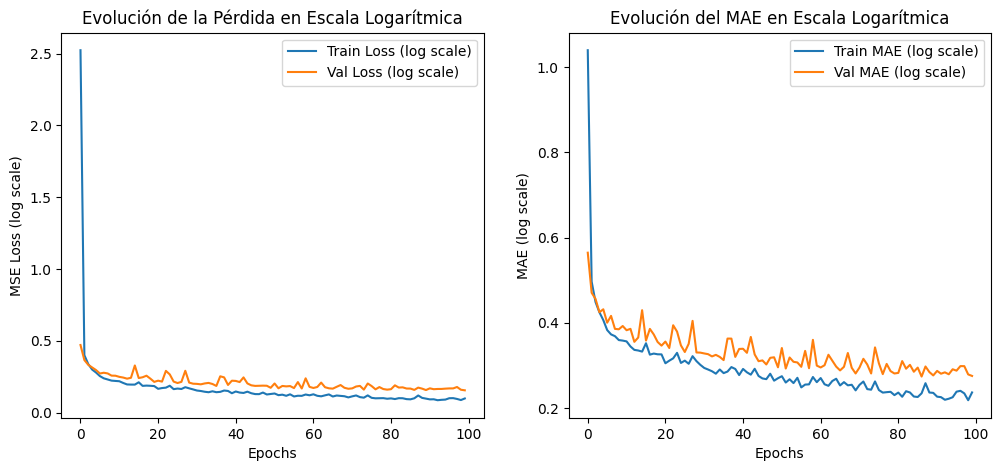

In [ ]:
import matplotlib.pyplot as plt

# Crear una figura con dos subgráficos
plt.figure(figsize=(12, 5))

# Pérdida (MSE) en escala log
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss (log scale)')
plt.plot(history.history['val_loss'], label='Val Loss (log scale)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss (log scale)')
plt.title('Evolución de la Pérdida en Escala Logarítmica')
plt.legend()

# MAE en escala log
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE (log scale)')
plt.plot(history.history['val_mae'], label='Val MAE (log scale)')
plt.xlabel('Epochs')
plt.ylabel('MAE (log scale)')
plt.title('Evolución del MAE en Escala Logarítmica')
plt.legend()

plt.show()


### **Visualización Loss en escala original "Red1"**

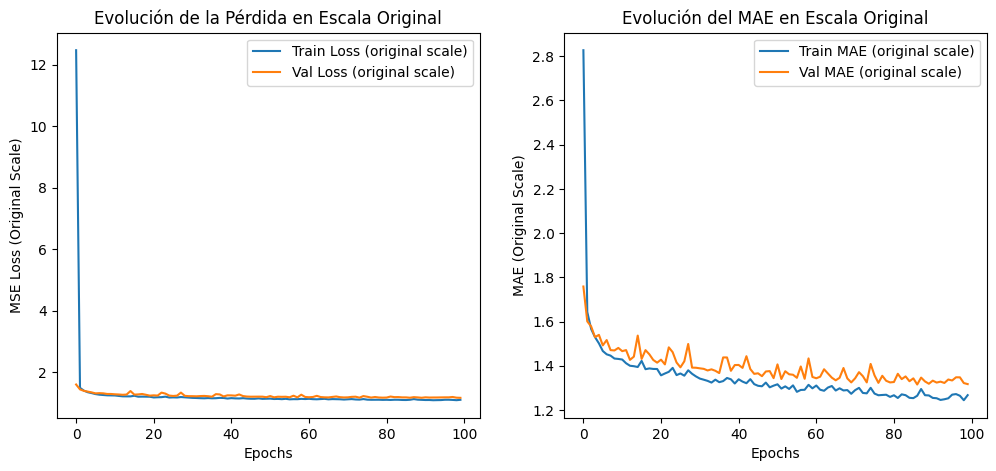

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Convertimos la pérdida y el MAE a escala original
train_loss_original = np.exp(history.history['loss'])
val_loss_original = np.exp(history.history['val_loss'])

train_mae_original = np.exp(history.history['mae'])
val_mae_original = np.exp(history.history['val_mae'])

# Crear una figura con dos subgráficos
plt.figure(figsize=(12, 5))

# Pérdida (MSE) en escala original
plt.subplot(1, 2, 1)
plt.plot(train_loss_original, label='Train Loss (original scale)')
plt.plot(val_loss_original, label='Val Loss (original scale)')
plt.xlabel('Epochs')
plt.ylabel('MSE Loss (Original Scale)')
plt.title('Evolución de la Pérdida en Escala Original')
plt.legend()

# MAE en escala original
plt.subplot(1, 2, 2)
plt.plot(train_mae_original, label='Train MAE (original scale)')
plt.plot(val_mae_original, label='Val MAE (original scale)')
plt.xlabel('Epochs')
plt.ylabel('MAE (Original Scale)')
plt.title('Evolución del MAE en Escala Original')
plt.legend()

plt.show()


📌 **Evaluación del Modelo**

✅ El modelo generaliza bien, no hay una gran diferencia entre entrenamiento y validación.

✅ No hay sobreajuste severo, la validación sigue la tendencia del entrenamiento sin separaciones bruscas.

⚠️ Fluctuaciones en la validación, podrían mejorar con mayor regularización o ajuste de hiperparámetros.

🚀 El modelo es funcional en la escala original y parece estar bien ajustado.

In [ ]:
model_tabular.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1.keras")


In [ ]:

from tensorflow.keras.models import load_model

# Cargar el modelo guardado
modelo_cargado = load_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1.keras")

# Comprobar que funciona
modelo_cargado.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,188 (114.02 KB)

 Trainable params: 14,593 (57.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,595 (57.02 KB)

# **Evaluando en Test "Red1"**

In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar el mejor modelo guardado
modelo_cargado = load_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1.keras")

# Generar predicciones en escala log
y_test_pred_log = modelo_cargado.predict(X_test_tab)

# Convertir predicciones a escala original
y_test_pred_real = np.exp(y_test_pred_log)
y_test_real = np.exp(y_test_tab)

# Función para calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Calcular métricas en test (escala log)
mae_test_log, rmse_test_log, r2_test_log = calcular_metricas(y_test_tab, y_test_pred_log)

# Calcular métricas en test (escala original)
mae_test_real, rmse_test_real, r2_test_real = calcular_metricas(y_test_real, y_test_pred_real)

# Imprimir resultados en el formato esperado
print(f"\nRESULTADOS DEL MEJOR MODELO EN TEST:")
print(f"Test (Log): MAE: {mae_test_log:.4f}, RMSE: {rmse_test_log:.4f}, R²: {r2_test_log:.4f}")
print(f"Test (Original): MAE: {mae_test_real:.4f}, RMSE: {rmse_test_real:.4f}, R²: {r2_test_real:.4f}")


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))



RESULTADOS DEL MEJOR MODELO EN TEST:
Test (Log): MAE: 0.2998, RMSE: 0.4251, R²: 0.6222
Test (Original): MAE: 55.8314, RMSE: 107.0662, R²: 0.5667


## **Análisis en Test "Red1"**

⚠️ **El rendimiento en test es ligeramente peor que en val.**

Hubo un aumento en el MAE y RMSE en test, el modelo pudo haber aprendido algunos patrones específicos del set de validación y no generaliza perfectamente a nuevos datos.

Sin embargo, el R² en test (0.5667) sigue siendo decente.

🔄 MAE en log sube de 0.2754 a 0.2998, lo que sugiere que el modelo es un poco menos preciso en valores absolutos en test.

🔄 RMSE en log aumenta de 0.3943 a 0.4251, lo que indica una mayor dispersión en los errores.

🔄 R² en escala original en test es mejor que en val (0.5667 vs 0.5059), lo que sugiere que la predicción sobre test es más estable.

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


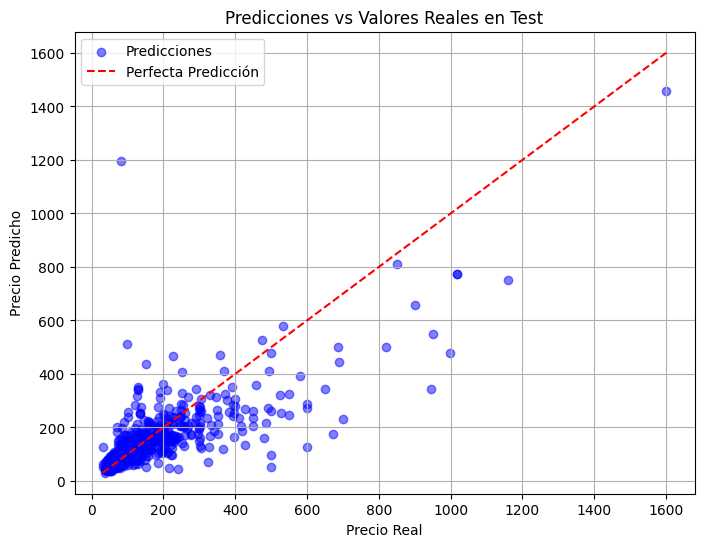

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Cargar el mejor modelo guardado
modelo_cargado = load_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1.keras")

# Generar predicciones en escala log
y_test_pred_log = modelo_cargado.predict(X_test_tab)

# Convertir predicciones a escala original
y_test_pred_real = np.exp(y_test_pred_log)
y_test_real = np.exp(y_test_tab)

# Gráfico de dispersión Real vs Predicho en escala original
plt.figure(figsize=(8, 6))
plt.scatter(y_test_real, y_test_pred_real, alpha=0.5, label="Predicciones", color="blue")
plt.plot([y_test_real.min(), y_test_real.max()], [y_test_real.min(), y_test_real.max()], '--', color='red', label="Perfecta Predicción")
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Predicciones vs Valores Reales en Test")
plt.legend()
plt.grid()
plt.show()


🔍 **Análisis Plot "Red1"**

La mayoría de los puntos se agrupan en la parte baja del gráfico.

✅ El modelo parece predecir bien para precios entre 0 y 300, ya que los puntos azules están relativamente cerca de la línea roja.

❌ Para precios reales mayores a 500, el modelo tiende a subestimar los valores reales, ya que los puntos están por debajo de la línea roja. Esto indica que el modelo no está capturando bien las propiedades más caras.

Hay algunos puntos con precios reales altos (1000-1600) pero predicciones bajas (400-800). El modelo no ha aprendido correctamente para propiedades caras.

# **Ajustando la función de pérdida para mejorar predicción en precios altos de "Red1"**

MSE es muy sensible a precios extremos, en este caso el dataset tiene una subestimacion en precios altos probaré con una función deperdida mas robusta a estos valores.

    **Huber Loss**
Menos sensible a outliers.

Funciona bien cuando hay valores extremos en los datos.

Se comporta como MSE para valores pequeños y como MAE para valores grandes.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.losses import Huber

# Cargar los datos
input_shape = X_train_tab.shape[1]

# Definir la red neuronal con Huber Loss
def build_tabular_nn_huber(input_shape):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(128, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='linear')
    ])

    # Usamos Huber Loss en lugar de MSE
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss=Huber(delta=1.0),
                  metrics=['mae'])
    return model

# Crear modelo
model_huber = build_tabular_nn_huber(input_shape)

# Callbacks para mejor entrenamiento
checkpoint_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_huber.keras"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001, verbose=1)

# Entrenar con la nueva función de pérdida
history_huber = model_huber.fit(X_train_tab, y_train_tab,
                                validation_data=(X_val_tab, y_val_tab),
                                epochs=100,
                                batch_size=32,
                                verbose=1,
                                callbacks=[checkpoint, early_stopping, lr_scheduler])

# Cargar el mejor modelo guardado
model_huber = keras.models.load_model(checkpoint_path)
print("Modelo con Huber Loss cargado desde:", checkpoint_path)

# Predicciones en test
y_test_pred_log = model_huber.predict(X_test_tab)
y_test_pred_real = np.exp(y_test_pred_log)
y_test_real = np.exp(y_test_tab)

# Función para calcular métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Calcular métricas en escala log
mae_test_log, rmse_test_log, r2_test_log = calcular_metricas(y_test_tab, y_test_pred_log)

# Calcular métricas en escala original
mae_test_real, rmse_test_real, r2_test_real = calcular_metricas(y_test_real, y_test_pred_real)

# Imprimir resultados en formato esperado
print("\nRESULTADOS DEL MODELO CON HUBER LOSS:")
print(f"Test (Log): MAE: {mae_test_log:.4f}, RMSE: {rmse_test_log:.4f}, R²: {r2_test_log:.4f}")
print(f"Test (Original): MAE: {mae_test_real:.4f}, RMSE: {rmse_test_real:.4f}, R²: {r2_test_real:.4f}")


Epoch 1/100
38/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.7181 - mae: 3.1677 
Epoch 1: val_loss improved from inf to 0.19201, saving model to /content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_huber.keras
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 1.9392 - mae: 2.3583 - val_loss: 0.1920 - val_mae: 0.5073 - learning_rate: 0.0010
Epoch 2/100
37/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1658 - mae: 0.4565 
Epoch 2: val_loss improved from 0.19201 to 0.17430, saving model to /content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_huber.keras
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1673 - mae: 0.4590 - val_loss: 0.1743 - val_mae: 0.4815 - learning_rate: 0.0010
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1570 - mae: 0.4357
Epoch 3: val_loss improved from 0.17430 to 0.15330, saving model to /content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_huber.keras
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - l

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.losses import Huber

# Cargar los datos
input_shape = X_train_tab.shape[1]

# Definir la red mejorada con Huber Loss
def build_tabular_nn_huber_optimized(input_shape):
    model = models.Sequential([
        layers.Input(shape=(input_shape,)),
        layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
        layers.BatchNormalization(),
        layers.Dense(1, activation='linear')
    ])

    # Ajustamos delta y learning rate
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005),
                  loss=Huber(delta=2.0),
                  metrics=['mae'])
    return model

# Crear modelo
model_huber_opt = build_tabular_nn_huber_optimized(input_shape)

# Callbacks para mejor entrenamiento
checkpoint_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_huber_opt.keras"
checkpoint = ModelCheckpoint(filepath=checkpoint_path, save_best_only=True, monitor='val_loss', mode='min', verbose=1)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001, verbose=1)

# Entrenar con la nueva función de pérdida
history_huber_opt = model_huber_opt.fit(X_train_tab, y_train_tab,
                                        validation_data=(X_val_tab, y_val_tab),
                                        epochs=100,
                                        batch_size=32,
                                        verbose=1,
                                        callbacks=[checkpoint, early_stopping, lr_scheduler])

# Cargar el mejor modelo guardado
model_huber_opt = keras.models.load_model(checkpoint_path)
print("Modelo con Huber Loss (Optimizado) cargado desde:", checkpoint_path)

# Predicciones en test
y_test_pred_log = model_huber_opt.predict(X_test_tab)
y_test_pred_real = np.exp(y_test_pred_log)
y_test_real = np.exp(y_test_tab)

# Función para calcular métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Calcular métricas en escala log
mae_test_log, rmse_test_log, r2_test_log = calcular_metricas(y_test_tab, y_test_pred_log)

# Calcular métricas en escala original
mae_test_real, rmse_test_real, r2_test_real = calcular_metricas(y_test_real, y_test_pred_real)

# Imprimir resultados en formato esperado
print("\nRESULTADOS DEL MODELO CON HUBER LOSS (OPTIMIZADO):")
print(f"Test (Log): MAE: {mae_test_log:.4f}, RMSE: {rmse_test_log:.4f}, R²: {r2_test_log:.4f}")
print(f"Test (Original): MAE: {mae_test_real:.4f}, RMSE: {rmse_test_real:.4f}, R²: {r2_test_real:.4f}")


Epoch 1/100
54/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.5910 - mae: 4.7949
Epoch 1: val_loss improved from inf to 9.62348, saving model to /content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_huber_opt.keras
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 7.5769 - mae: 4.7878 - val_loss: 9.6235 - val_mae: 5.8117 - learning_rate: 5.0000e-04
Epoch 2/100
51/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7.0501 - mae: 4.5250
Epoch 2: val_loss improved from 9.62348 to 6.41811, saving model to /content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_huber_opt.keras
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6.9912 - mae: 4.4955 - val_loss: 6.4181 - val_mae: 4.2086 - learning_rate: 5.0000e-04
Epoch 3/100
53/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 6.0800 - mae: 4.0396
Epoch 3: val_loss improved from 6.41811 to 4.74556, saving model to /content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_huber_opt.keras
66/66 ━━━━━━━━━━━━━━━━━━

## ⏰ **No funcionó cambiar la función de perdida 2 veces, las métricas no mejoraron**

# 👀**Mejorando el modelo tabular "Red1"**

**Haré primero un k-folds de este modelo "Red1" para una evaluación mas robusta ante diferentes subconjuntos de datos.**



In [ ]:
from sklearn.model_selection import KFold
from tensorflow.keras.models import load_model
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Cargar el modelo guardado
modelo_cargado = load_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1.keras")

# Configuración para K-folds
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Para almacenar los resultados de cada fold
mae_list_log = []
rmse_list_log = []
r2_list_log = []

mae_list_real = []
rmse_list_real = []
r2_list_real = []

# K-folds: iterar sobre los splits
for train_index, val_index in kf.split(X_train_tab):
    # Dividir el conjunto de train y val
    # Use .iloc to select rows based on indices:
    X_train_fold, X_val_fold = X_train_tab.iloc[train_index], X_train_tab.iloc[val_index]
    y_train_fold, y_val_fold = y_train_tab[train_index], y_train_tab[val_index]

    # Evaluar el modelo en cada fold
    y_pred_val_log = modelo_cargado.predict(X_val_fold)

    # Convertimos las predicciones de log a la escala original (exponencial)
    y_pred_val_real = np.exp(y_pred_val_log)
    y_val_real = np.exp(y_val_fold)

    # Calcular las métricas en escala log
    mae_log = mean_absolute_error(y_val_fold, y_pred_val_log)
    rmse_log = np.sqrt(mean_squared_error(y_val_fold, y_pred_val_log))
    r2_log = r2_score(y_val_fold, y_pred_val_log)

    # Calcular las métricas en escala original
    mae_real = mean_absolute_error(y_val_real, y_pred_val_real)
    rmse_real = np.sqrt(mean_squared_error(y_val_real, y_pred_val_real))
    r2_real = r2_score(y_val_real, y_pred_val_real)

    # Guardar los resultados en escala log
    mae_list_log.append(mae_log)
    rmse_list_log.append(rmse_log)
    r2_list_log.append(r2_log)

    # Guardar los resultados en escala original
    mae_list_real.append(mae_real)
    rmse_list_real.append(rmse_real)
    r2_list_real.append(r2_real)

# Promediar los resultados de todos los folds
mae_avg_log = np.mean(mae_list_log)
rmse_avg_log = np.mean(rmse_list_log)
r2_avg_log = np.mean(r2_list_log)

mae_avg_real = np.mean(mae_list_real)
rmse_avg_real = np.mean(rmse_list_real)
r2_avg_real = np.mean(r2_list_real)

# Imprimir los resultados promedio en escala log y en escala original
print(f"Promedio MAE en escala log: {mae_avg_log:.4f}")
print(f"Promedio RMSE en escala log: {rmse_avg_log:.4f}")
print(f"Promedio R² en escala log: {r2_avg_log:.4f}")

print(f"Promedio MAE en escala original: {mae_avg_real:.4f}")
print(f"Promedio RMSE en escala original: {rmse_avg_real:.4f}")
print(f"Promedio R² en escala original: {r2_avg_real:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Promedio MAE en escala log: 0.1999
Promedio RMSE en escala log: 0.2747
Promedio R² en escala log: 0.8541
Promedio MAE en escala original: 41.4824
Promedio RMSE en escala original: 88.5919
Promedio R² en escala original: 0.7717



⏪ **Análisis k-folds:**

**En escala log:** Se comporta mejor el modelo en escala log.

El R² es muy alto (0.8541), lo que significa que el modelo está explicando bien la variabilidad de los datos. Tiene un buen desempeño en la escala logarítmica.

El RMSE de 0.2747 es bajo, lo que implica que el modelo tiene poca desviación de las predicciones respecto a los valores reales en escala log.

El MAE de 0.1999 también es bajo, lo que indica que, en promedio, las predicciones están cerca de los valores reales en escala log.


**En escala original:**

El MAE de 41.4824 y el RMSE de 88.5919 son mayores, lo que refleja una mayor diferencia entre las predicciones y los valores reales en la escala original.

El R² de 0.7717 sigue siendo bueno, pero es algo inferior al valor en escala log, lo que sugiere que el modelo está más ajustado a la escala log que a la original.


# 👷 **Mejora del modelo "red1 v1" depués del k-folds**

✅ Aumento de MAE en la validación, se podría aumentar las capas y ayudar a que el modelo capte más complejidad en los datos.

✅ Usar un planificador de tasa de aprendizaje como ReduceLROnPlateau con un valor inicial de 1e-4 a 1e-3.

🔴 Implementar ReduceLROnPlateau que reduzca el LR cuando la validación no mejora, y probar con un LR inicial en el rango de 1e-4 a 1e-3.

🔴 Añadir EarlyStopping(monitor='val_loss', patience=10) y ajustar el número de épocas a un valor más bajo, como 50-70, para ver si mejora la generalización.

✅ En las métricas, se observa que el modelo parece tener algo de sobreajuste debido al aumento en el MAE de validación.

🔴 Aumentar el Dropout a 0.3 o 0.4. Probar con L2 regularization (kernel_regularizer=l2(0.01)) si el modelo sigue teniendo sobreajuste.

✅ El optimizador Adam está funcionando bien, ya que proporciona una convergencia eficiente y adaptativa.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU # Import LeakyReLU
import numpy as np

# Arutecura del modelo
def build_tabular_nn(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),  # Input
        Dense(128, kernel_regularizer=l2(0.01)),
        LeakyReLU(),  # LeakyReLU activacón como capa separada
        Dropout(0.3),  # Aumento Dropout 0.3
        Dense(64, kernel_regularizer=l2(0.01)),
        LeakyReLU(),
        Dropout(0.3),
        Dense(32, kernel_regularizer=l2(0.01)),
        LeakyReLU(),
        Dropout(0.3),
        Dense(1, activation='linear')  # Output
    ])

    # Compilación del modelo
    model.compile(optimizer=Adam(learning_rate=1e-3),  # lr más alto
                  loss='mse',  # MSE en escala log
                  metrics=['mae', 'mse'])  # MAE en escala log

    return model

# Construcción del modelo
input_shape = X_train_tab.shape[1]  # Número de características en los datos de entrada
model_tabular = build_tabular_nn(input_shape)

# Añadir EarlyStopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Usar ReduceLROnPlateau para reducir la tasa de aprendizaje si val no mejora
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Entrenar el modelo
history = model_tabular.fit(
    X_train_tab, y_train_tab,
    validation_data=(X_val_tab, y_val_tab),
    epochs=70,  # Reduje el número de épocas y uso early stopping
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],  # Incluir callbacks
    verbose=1
)

# Predicciones en entrenamiento y validación (escala log)
y_train_pred_log = model_tabular.predict(X_train_tab)
y_val_pred_log = model_tabular.predict(X_val_tab)

# Convertimos a escala original (exponencial)
y_train_pred_real = np.exp(y_train_pred_log)
y_val_pred_real = np.exp(y_val_pred_log)
y_train_real = np.exp(y_train_tab)
y_val_real = np.exp(y_val_tab)

# Función para calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Cálculo de métricas en escala log
mae_train_log, rmse_train_log, r2_train_log = calcular_metricas(y_train_tab, y_train_pred_log)
mae_val_log, rmse_val_log, r2_val_log = calcular_metricas(y_val_tab, y_val_pred_log)

# Cálculo de métricas en escala original
mae_train_real, rmse_train_real, r2_train_real = calcular_metricas(y_train_real, y_train_pred_real)
mae_val_real, rmse_val_real, r2_val_real = calcular_metricas(y_val_real, y_val_pred_real)

# Impresión de resultados
print(f"Entrenamiento (Log): MAE: {mae_train_log:.4f}, RMSE: {rmse_train_log:.4f}, R²: {r2_train_log:.4f}")
print(f"Validación (Log): MAE: {mae_val_log:.4f}, RMSE: {rmse_val_log:.4f}, R²: {r2_val_log:.4f}")
print(f"Entrenamiento (Original): MAE: {mae_train_real:.4f}, RMSE: {rmse_train_real:.4f}, R²: {r2_train_real:.4f}")
print(f"Validación (Original): MAE: {mae_val_real:.4f}, RMSE: {rmse_val_real:.4f}, R²: {r2_val_real:.4f}")


Epoch 1/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 9.8672 - mae: 2.2123 - mse: 8.1092 - val_loss: 3.1557 - val_mae: 1.0200 - val_mse: 1.4369 - learning_rate: 0.0010
Epoch 2/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.0785 - mae: 1.2341 - mse: 2.3755 - val_loss: 3.2550 - val_mae: 1.1106 - val_mse: 1.5992 - learning_rate: 0.0010
Epoch 3/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.4976 - mae: 1.0834 - mse: 1.8571 - val_loss: 2.7288 - val_mae: 0.8951 - val_mse: 1.1361 - learning_rate: 0.0010
Epoch 4/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1881 - mae: 1.0139 - mse: 1.6115 - val_loss: 3.1393 - val_mae: 1.1066 - val_mse: 1.6110 - learning_rate: 0.0010
Epoch 5/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.9946 - mae: 0.9600 - mse: 1.4815 - val_loss: 2.7104 - val_mae: 0.9498 - val_mse: 1.2454 - learning_rate: 0.0010
Epoch 6/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7660 - mae: 0.9158 - mse: 1.3157 - val_loss: 2.2640 - val_mae: 0.7496 - val_mse:

In [ ]:
model_tabular.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1_notimproved.keras")


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


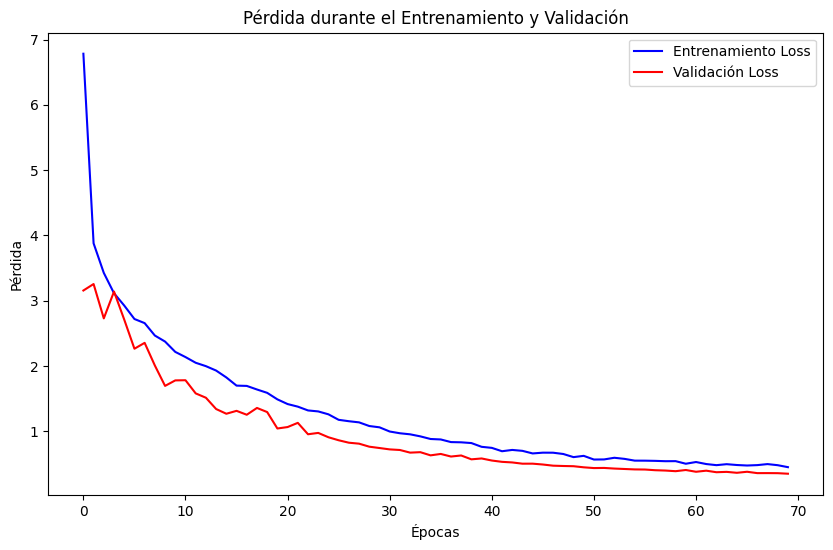

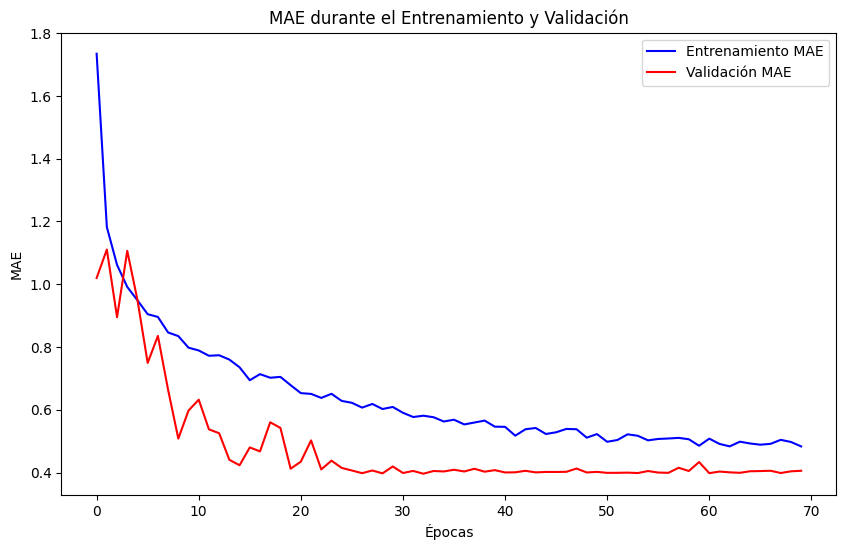

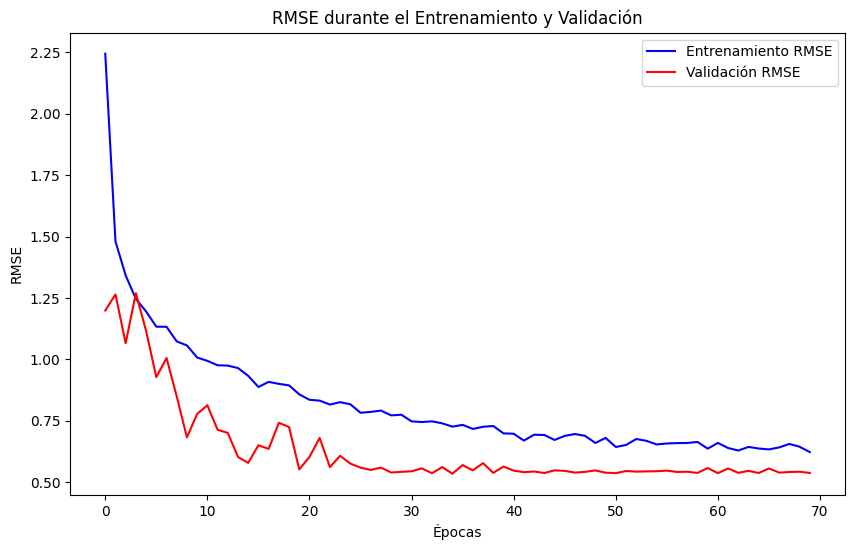

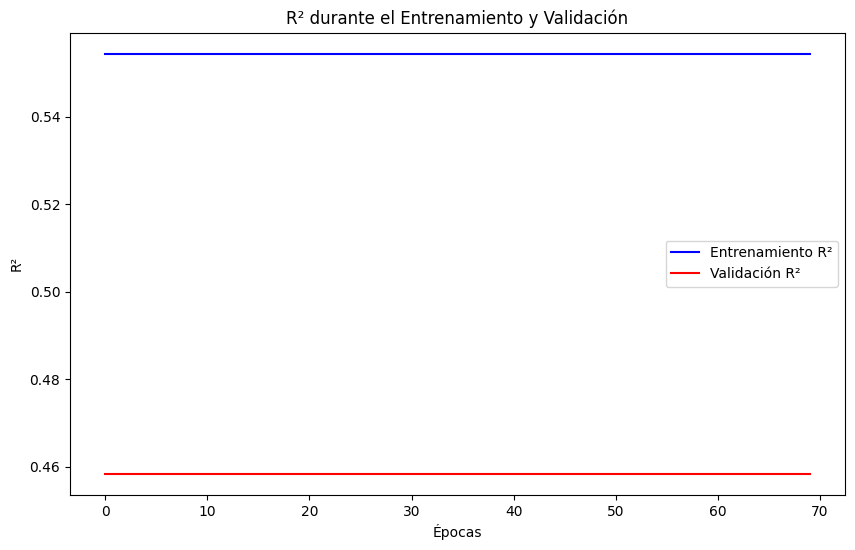

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# R² train y val
y_train_pred = model_tabular.predict(X_train_tab)
y_val_pred = model_tabular.predict(X_val_tab)

r2_train = r2_score(y_train_tab, y_train_pred)  # R² train
r2_val = r2_score(y_val_tab, y_val_pred)  # R² train val

# Gráfica de la evolución de la pérdida (loss)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Entrenamiento Loss', color='b')
plt.plot(history.history['val_loss'], label='Validación Loss', color='r')
plt.title('Pérdida durante el Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Gráfica de la evolución del MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Entrenamiento MAE', color='b')
plt.plot(history.history['val_mae'], label='Validación MAE', color='r')
plt.title('MAE durante el Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Gráfica de la evolución del RMSE
plt.figure(figsize=(10, 6))
# Convert the 'mse' values to a NumPy array before applying the square root
plt.plot(np.sqrt(history.history['mse']), label='Entrenamiento RMSE', color='b')
plt.plot(np.sqrt(history.history['val_mse']), label='Validación RMSE', color='r')
plt.title('RMSE durante el Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Plot R²
plt.figure(figsize=(10, 6))
plt.plot([r2_train] * len(history.history['loss']), label='Entrenamiento R²', color='b')
plt.plot([r2_val] * len(history.history['val_loss']), label='Validación R²', color='r')
plt.title('R² durante el Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('R²')
plt.legend()
plt.show()


## **Análisis de las Métricas mejora "Red1 v1"**

**MAE y RMSE (Escala Log):**

Han aumentado en las métricas, el modelo no está aprendiendo correctamente los patrones de los datos log-transformados.

R² (Escala Log):

El R² ha disminuido, el modelo ahora tiene un peor ajuste de los datos.


**Predicciones en Escala Original:**

También muestran un empeoramiento, está fallando en la conversión de las predicciones a la escala original.

### **Estrategia de mejora**

**Número de capas:** Reducir de 3 a 2 capas, con 64 y 32 neuronas, para evitar sobreajuste.

**Función de activación:** Mantener LeakyReLU, pero probar con un parámetro de slope de 0.2 o cambiar a ELU para mejorar la estabilidad de los gradientes.

**lr:** Reducir la tasa de aprendizaje inicial a 1e-4 o 1e-5 y usar ReduceLROnPlateau para disminuir la tasa cuando no haya mejoras.

**Regularización:** Aumentar el Dropout a 0.4-0.5 y probar L2 regularization en las capas densas para prevenir el sobreajuste.

**Función de pérdida:*** Cambiar a Huber Loss para reducir la sensibilidad a valores atípicos y mejorar la estabilidad.

**Épocas y EarlyStopping:** Usar EarlyStopping con paciencia de 5-10 épocas para evitar sobreentrenamiento.

**Optimizador:** Probar RMSProp para mejorar la convergencia.

**Métricas:** Continuar con MAE, RMSE y R², pero evaluar si el Huber Loss mejora la estabilidad de las métricas.

## **Modelo mejoras "Red1 v2"**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU, ELU
import numpy as np

# Definir la arquitectura del modelo con las mejoras propuestas
def build_tabular_nn(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),  #input
        Dense(64, kernel_regularizer=l2(0.01)),  # 1ª capa oculta con regularización L2
        LeakyReLU(alpha=0.2),  # LeakyReLU con slope de 0.2
        Dropout(0.4),  # Aumentar Dropout a 0.4
        Dense(32, kernel_regularizer=l2(0.01)),  # 2ª capa oculta con regularización L2
        LeakyReLU(alpha=0.2),
        Dropout(0.4),
        Dense(1, activation='linear')  #output
    ])

    # Compilación del modelo con RMSProp o Adam

    model.compile(optimizer=RMSprop(learning_rate=1e-4),  # Usar RMSProp con tasa de aprendizaje más baja
                  loss='huber',  # Usar Huber Loss para mejorar estabilidad
                  metrics=['mae', 'mse'])  # MAE y MSE para evaluar el desempeño

    return model

# Construcción del modelo
input_shape = X_train_tab.shape[1]  # Número de características en los datos de entrada
model_tabular = build_tabular_nn(input_shape)

# Añadir EarlyStopping y ReduceLROnPlateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

# Entrenar el modelo
history = model_tabular.fit(
    X_train_tab, y_train_tab,
    validation_data=(X_val_tab, y_val_tab),
    epochs=70,  # Reducir número de épocas
    batch_size=32,
    callbacks=[early_stopping, reduce_lr],  # Incluir callbacks
    verbose=1
)

# Predicciones en entrenamiento y validación (escala log)
y_train_pred_log = model_tabular.predict(X_train_tab)
y_val_pred_log = model_tabular.predict(X_val_tab)

# Convertimos a escala original (exponencial)
y_train_pred_real = np.exp(y_train_pred_log)
y_val_pred_real = np.exp(y_val_pred_log)
y_train_real = np.exp(y_train_tab)
y_val_real = np.exp(y_val_tab)

# Función para calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Cálculo de métricas en escala log
mae_train_log, rmse_train_log, r2_train_log = calcular_metricas(y_train_tab, y_train_pred_log)
mae_val_log, rmse_val_log, r2_val_log = calcular_metricas(y_val_tab, y_val_pred_log)

# Cálculo de métricas en escala original
mae_train_real, rmse_train_real, r2_train_real = calcular_metricas(y_train_real, y_train_pred_real)
mae_val_real, rmse_val_real, r2_val_real = calcular_metricas(y_val_real, y_val_pred_real)

# Impresión de resultados
print(f"Entrenamiento (Log): MAE: {mae_train_log:.4f}, RMSE: {rmse_train_log:.4f}, R²: {r2_train_log:.4f}")
print(f"Validación (Log): MAE: {mae_val_log:.4f}, RMSE: {rmse_val_log:.4f}, R²: {r2_val_log:.4f}")
print(f"Entrenamiento (Original): MAE: {mae_train_real:.4f}, RMSE: {rmse_train_real:.4f}, R²: {r2_train_real:.4f}")
print(f"Validación (Original): MAE: {mae_val_real:.4f}, RMSE: {rmse_val_real:.4f}, R²: {r2_val_real:.4f}")

Epoch 1/70


/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3.4978 - mae: 3.1081 - mse: 14.9949 - val_loss: 1.2881 - val_mae: 0.8164 - val_mse: 1.0562 - learning_rate: 1.0000e-04
Epoch 2/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 3.0136 - mae: 2.6251 - mse: 11.3029 - val_loss: 1.2121 - val_mae: 0.7357 - val_mse: 0.8875 - learning_rate: 1.0000e-04
Epoch 3/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7049 - mae: 2.3257 - mse: 8.5873 - val_loss: 1.2244 - val_mae: 0.7644 - val_mse: 0.9696 - learning_rate: 1.0000e-04
Epoch 4/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4032 - mae: 2.0306 - mse: 6.2996 - val_loss: 1.3706 - val_mae: 0.9495 - val_mse: 1.3953 - learning_rate: 1.0000e-04
Epoch 5/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.2685 - mae: 1.9020 - mse: 5.8015 - val_loss: 1.3670 - val_mae: 0.9628 - val_mse: 1.4046 - learning_rate: 1.0000e-04
Epoch 6/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0939 - mae: 1.7372 - mse: 4.8669 - val_loss: 1.4587 - val_mae: 1.0910

66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


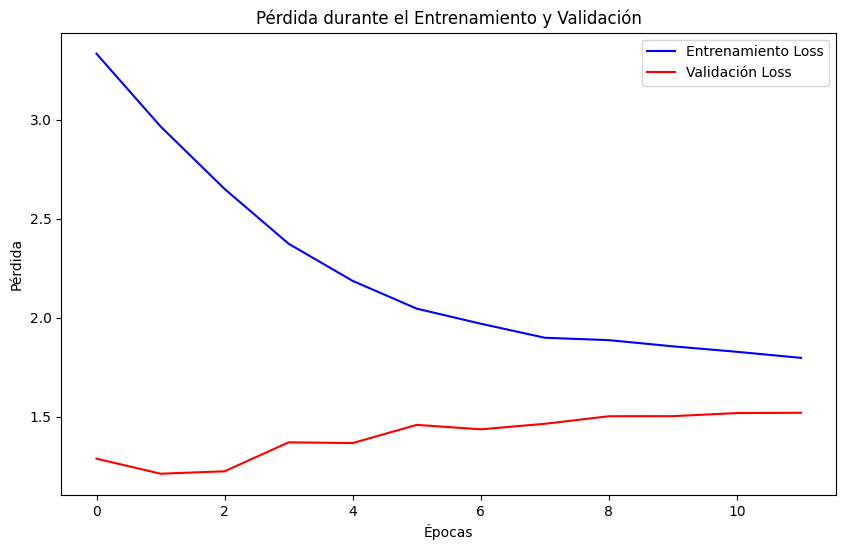

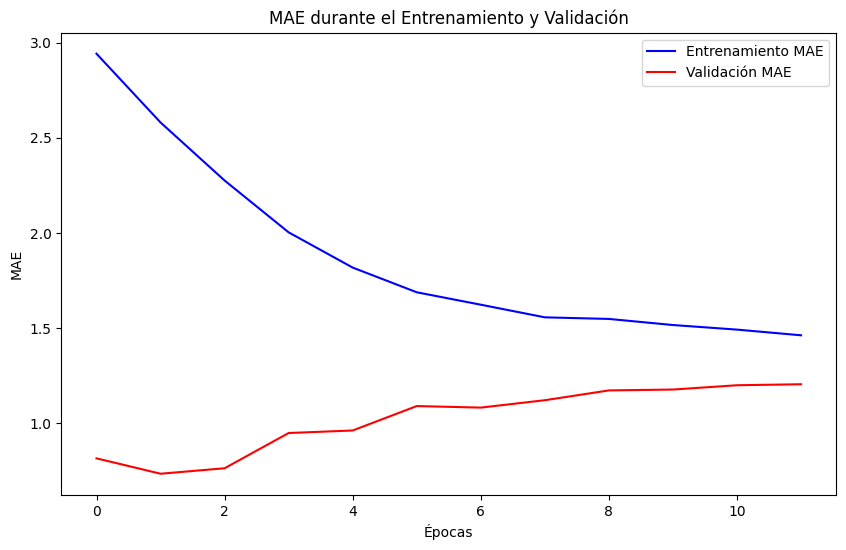

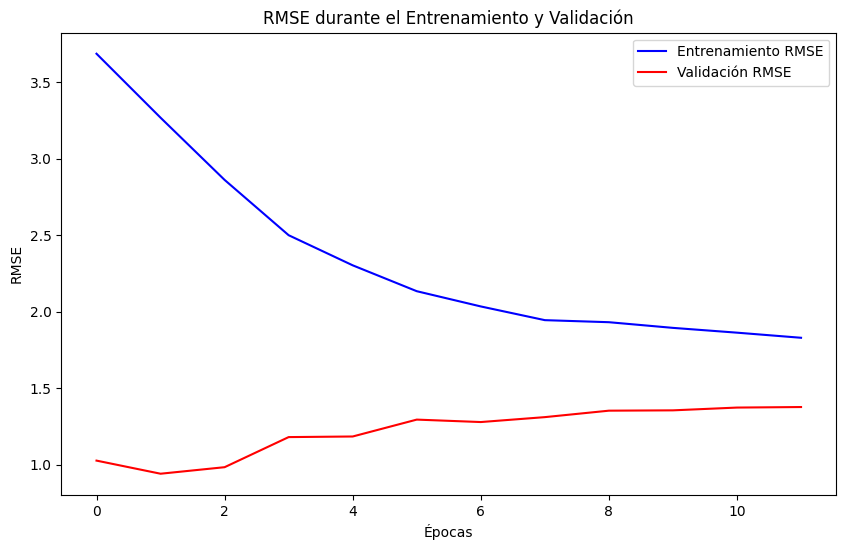

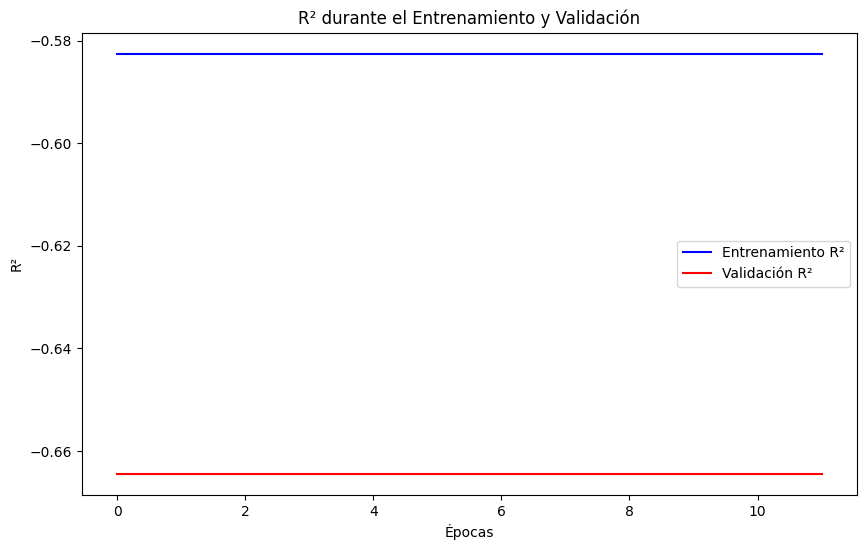

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score

# R² train y val
y_train_pred = model_tabular.predict(X_train_tab)
y_val_pred = model_tabular.predict(X_val_tab)

r2_train = r2_score(y_train_tab, y_train_pred)  # R² train
r2_val = r2_score(y_val_tab, y_val_pred)  # R² train Val

# Gráfica de la evolución de la pérdida (loss)
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Entrenamiento Loss', color='b')
plt.plot(history.history['val_loss'], label='Validación Loss', color='r')
plt.title('Pérdida durante el Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Gráfica de la evolución del MAE
plt.figure(figsize=(10, 6))
plt.plot(history.history['mae'], label='Entrenamiento MAE', color='b')
plt.plot(history.history['val_mae'], label='Validación MAE', color='r')
plt.title('MAE durante el Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('MAE')
plt.legend()
plt.show()

# Gráfica de la evolución del RMSE
plt.figure(figsize=(10, 6))
# Convert the 'mse' values to a NumPy array before applying the square root
plt.plot(np.sqrt(history.history['mse']), label='Entrenamiento RMSE', color='b')
plt.plot(np.sqrt(history.history['val_mse']), label='Validación RMSE', color='r')
plt.title('RMSE durante el Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# Plot R²
plt.figure(figsize=(10, 6))
plt.plot([r2_train] * len(history.history['loss']), label='Entrenamiento R²', color='b')
plt.plot([r2_val] * len(history.history['val_loss']), label='Validación R²', color='r')
plt.title('R² durante el Entrenamiento y Validación')
plt.xlabel('Épocas')
plt.ylabel('R²')
plt.legend()
plt.show()


In [ ]:
model_tabular.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1_notimproved2.keras")

## **Análisis modelo mejoras "red1 v2"**

R² negativo:

El modelo no está siendo capaz de capturar una relación significativa entre las predicciones y los valores reales.está prediciendo peor que una simple media de los valores, lo cual es un indicio claro de que el modelo no está aprendiendo adecuadamente.

MAE y RMSE elevados:

Bastante altos, lo que significa que las predicciones están bastante alejadas de los valores reales, tanto en la escala logarítmica como en la original.


**Gráfica Loss:**

Hay caída rápida de la pérdida en las primeras épocas, lo que indica que el modelo estaba aprendiendo rápidamente al principio, pero se estabilizó y mostró poca mejora después de unas cuantas épocas. Puede que el modelo se haya estancado, posiblemente debido a un sobreajuste o a que los parámetros no son óptimos.

RMSE y MAE:

RMSE y MAE también muestran una caída inicial en las primeras épocas, pero luego se estancan, lo cual sugiere que el modelo está teniendo dificultades para mejorar su capacidad predictiva.

El comportamiento de la curva roja indica que el modelo no generaliza bien a datos no vistos, ya que no mejora en validación.


### 🕐 **Estrategia mejora "red1 v3"**

**Arquitectura de la red:**

Dense(64) → Dense(32)

Dense(32) → Dense(16)

**Activación:**

LeakyReLU() → Swish()


**lr:**

Cambiar a learning_rate=1e-4 para mejorar la convergencia.

Adam(learning_rate=1e-3) → Adam(learning_rate=1e-4)


**Número de épocas:**

Reducir el número de épocas a 50 para evitar overfitting.

epochs=70 → epochs=50

**Regularización:**

Aumentar el dropout a 0.5 para evitar el overfitting.

Usar L2 regularization en lugar de L1 para un efecto de regularización más suave y efectivo.

Dropout(0.3) → Dropout(0.5)

Usar kernel_regularizer=l2(0.01) en las capas densas.

**Función de pérdida:**

loss='mse' → loss='huber'

**Optimizer:**

RMSProp es un optimizador muy efectivo para tareas de regresión, especialmente cuando se trabaja con datos log-transformados.

optimizer=Adam(learning_rate=1e-4) → optimizer=RMSprop(learning_rate=1e-4)

In [ ]:
!pip install tensorflow --upgrade  # Upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 615.4/615.4 MB 815.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 80.1 MB/s eta 0:00:00
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.17.1
    Uninstalling tensorboard-2.17.1:
      Successfully uninstalled tensorboard-2.17.1
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.17.1
    Uninstalling tensorflow-2.17.1:
      Successfully uninstalled tensorflow-2.17.1
y
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.18.0 which is incompatible.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input, Activation  # Import Activation
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.activations import swish  # Import swish from activations
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score # Import necessary metrics

# Define the model architecture
def build_tabular_nn(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),
        Dense(32, kernel_regularizer=l2(0.01)),
        # Use swish activation from tensorflow.keras.activations
        Activation(swish),
        Dropout(0.5),
        Dense(16, kernel_regularizer=l2(0.01)),
        Activation(swish),
        Dropout(0.5),
        Dense(1, activation='linear')
    ])

    model.compile(optimizer=RMSprop(learning_rate=1e-4),
                  loss='huber',
                  metrics=['mae', 'mse'])

    return model

# Construcción del modelo
input_shape = X_train_tab.shape[1]  # Número de características en los datos de entrada
model_tabular = build_tabular_nn(input_shape)

# Añadir EarlyStopping para evitar sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Entrenar el modelo
history = model_tabular.fit(
    X_train_tab, y_train_tab,
    validation_data=(X_val_tab, y_val_tab),
    epochs=50,  # Reducir el número de épocas
    batch_size=32,
    callbacks=[early_stopping],  # Incluir EarlyStopping
    verbose=1
)

# Predicciones en entrenamiento y validación (escala log)
y_train_pred_log = model_tabular.predict(X_train_tab)
y_val_pred_log = model_tabular.predict(X_val_tab)

# Convertimos a escala original (exponencial)
y_train_pred_real = np.exp(y_train_pred_log)
y_val_pred_real = np.exp(y_val_pred_log)
y_train_real = np.exp(y_train_tab)
y_val_real = np.exp(y_val_tab)

# Función para calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Cálculo de métricas en escala log
mae_train_log, rmse_train_log, r2_train_log = calcular_metricas(y_train_tab, y_train_pred_log)
mae_val_log, rmse_val_log, r2_val_log = calcular_metricas(y_val_tab, y_val_pred_log)

# Cálculo de métricas en escala original
mae_train_real, rmse_train_real, r2_train_real = calcular_metricas(y_train_real, y_train_pred_real)
mae_val_real, rmse_val_real, r2_val_real = calcular_metricas(y_val_real, y_val_pred_real)

# Impresión de resultados
print(f"Entrenamiento (Log): MAE: {mae_train_log:.4f}, RMSE: {rmse_train_log:.4f}, R²: {r2_train_log:.4f}")
print(f"Validación (Log): MAE: {mae_val_log:.4f}, RMSE: {rmse_val_log:.4f}, R²: {r2_val_log:.4f}")
print(f"Entrenamiento (Original): MAE: {mae_train_real:.4f}, RMSE: {rmse_train_real:.4f}, R²: {r2_train_real:.4f}")
print(f"Validación (Original): MAE: {mae_val_real:.4f}, RMSE: {rmse_val_real:.4f}, R²: {r2_val_real:.4f}")


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 5.2938 - mae: 5.2304 - mse: 42.7235 - val_loss: 1.8638 - val_mae: 1.7802 - val_mse: 4.2368
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.9543 - mae: 4.9056 - mse: 35.8352 - val_loss: 1.5638 - val_mae: 1.4707 - val_mse: 3.0500
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 4.6133 - mae: 4.5713 - mse: 32.5009 - val_loss: 1.4970 - val_mae: 1.4080 - val_mse: 2.8226
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 4.3447 - mae: 4.3064 - mse: 29.1550 - val_loss: 1.4020 - val_mae: 1.3175 - val_mse: 2.5131
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.6871 - mae: 3.6494 - mse: 20.6507 - val_loss: 1.3374 - val_mae: 1.2570 - val_mse: 2.3177
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.6270 - mae: 3.6019 - mse: 19.3557 - val_loss: 1.3726 - val_mae: 1.3058 - val_mse: 2.4617
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.3888 - mae: 3.3677 - mse: 16.9795 - val_loss:

## **Análisis modelo mejoras "red1 v3"**

Rendimiento bajo, AE y RMSE son altos en ambas escalas, lo que indica que las predicciones no son precisas.

R² negativo en ambos conjuntos muestra que el modelo no está capturando la relación entre las características y el objetivo, incluso peor que un modelo simple basado en la media.

Presenta sobreajuste pues tiene mejor rendimiento en entrenamiento que en validación (mayor error en validación), lo que indica overfitting.



## **Modelo mejoras "red1 v4"**

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Definir la arquitectura del modelo con los ajustes propuestos
def build_tabular_nn(input_shape):
    model = Sequential([
        Input(shape=(input_shape,)),  # input
        Dense(64, kernel_regularizer=l2(0.01)),
        tf.keras.layers.ReLU(),  # ReLU como activación
        Dropout(0.3),  # Dropout ajustado
        Dense(32, kernel_regularizer=l2(0.01)),
        tf.keras.layers.ReLU(),
        Dropout(0.3),
        Dense(1, activation='linear')  # output
    ])

    # Compilación del modelo con optimizador SGD
    model.compile(optimizer=SGD(learning_rate=1e-4, momentum=0.9),  # SGD lr más bajo
                  loss='mse',
                  metrics=['mae', 'mse'])

    return model

# Construcción del modelo
input_shape = X_train_tab.shape[1]
model_tabular = build_tabular_nn(input_shape)

# EarlyStopping para evitar el sobreajuste
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Entrenamiento del modelo
history = model_tabular.fit(
    X_train_tab, y_train_tab,
    validation_data=(X_val_tab, y_val_tab),
    epochs=70,  # Número de épocas ajustado
    batch_size=32,
    callbacks=[early_stopping],  # Incluir EarlyStopping
    verbose=1
)

# Predicciones en entrenamiento y validación (escala log)
y_train_pred_log = model_tabular.predict(X_train_tab)
y_val_pred_log = model_tabular.predict(X_val_tab)

# Convertimos a escala original (exponencial)
y_train_pred_real = np.exp(y_train_pred_log)
y_val_pred_real = np.exp(y_val_pred_log)
y_train_real = np.exp(y_train_tab)
y_val_real = np.exp(y_val_tab)

# Función para calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Cálculo de métricas en escala log
mae_train_log, rmse_train_log, r2_train_log = calcular_metricas(y_train_tab, y_train_pred_log)
mae_val_log, rmse_val_log, r2_val_log = calcular_metricas(y_val_tab, y_val_pred_log)

# Cálculo de métricas en escala original
mae_train_real, rmse_train_real, r2_train_real = calcular_metricas(y_train_real, y_train_pred_real)
mae_val_real, rmse_val_real, r2_val_real = calcular_metricas(y_val_real, y_val_pred_real)

# Impresión de resultados
print(f"Entrenamiento (Log): MAE: {mae_train_log:.4f}, RMSE: {rmse_train_log:.4f}, R²: {r2_train_log:.4f}")
print(f"Validación (Log): MAE: {mae_val_log:.4f}, RMSE: {rmse_val_log:.4f}, R²: {r2_val_log:.4f}")
print(f"Entrenamiento (Original): MAE: {mae_train_real:.4f}, RMSE: {rmse_train_real:.4f}, R²: {r2_train_real:.4f}")
print(f"Validación (Original): MAE: {mae_val_real:.4f}, RMSE: {rmse_val_real:.4f}, R²: {r2_val_real:.4f}")


Epoch 1/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 17.6320 - mae: 3.1017 - mse: 16.8027 - val_loss: 2.3650 - val_mae: 1.0481 - val_mse: 1.5398
Epoch 2/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.9699 - mae: 1.4407 - mse: 3.1453 - val_loss: 2.0314 - val_mae: 0.9126 - val_mse: 1.2088
Epoch 3/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5649 - mae: 1.3483 - mse: 2.7430 - val_loss: 1.6740 - val_mae: 0.7412 - val_mse: 0.8538
Epoch 4/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 3.1037 - mae: 1.2236 - mse: 2.2842 - val_loss: 1.6850 - val_mae: 0.7405 - val_mse: 0.8673
Epoch 5/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7850 - mae: 1.1300 - mse: 1.9679 - val_loss: 1.7318 - val_mae: 0.7647 - val_mse: 0.9164
Epoch 6/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.7046 - mae: 1.1007 - mse: 1.8900 - val_loss: 1.8065 - val_mae: 0.8031 - val_mse: 0.9938
Epoch 7/70
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.6883 - mae: 1.0795 - mse: 1.8762 - val_loss: 1.788

## **Análisis modelo mejoras "red1 v4**

Rendimiento mejorado en comparación al anterior pues MAE y RMSE son más bajos, pero aún altos, lo que indica que el modelo sigue sin ajustarse bien a los datos.

R² negativo sugiere que el modelo sigue siendo incapaz de capturar la relación entre las características y el objetivo de manera efectiva.


## ❌ **Despúes de varias pruebas sigue sin mejorar y solo empeora, el "mejor" modelo hasta ahora sigue siendo el "Red1" con estas métricas:**

Entrenamiento (Log): MAE: 0.1999, RMSE: 0.2748, R²: 0.8545

Validación (Log): MAE: 0.2754, RMSE: 0.3943, R²: 0.7083

Entrenamiento (Original): MAE: 41.4824, RMSE: 89.2999, R²: 0.7754

Validación (Original): MAE: 52.4443, RMSE: 129.3801, R²: 0.5059

**Resultados en Test:**

Test (Log): MAE: 0.2998, RMSE: 0.4251, R²: 0.6222

Test (Original): MAE: 55.8314, RMSE: 107.0662, R²: 0.5667


# ⚓ **Utilizaré Keras Tuner para encontrar los mejores hiperparámetros del modelo "Red1"**

Se optimizará:

1️⃣ Número de neuronas por capa (64, 128, 256)

2️⃣ Número de capas ocultas (2, 3, 4)

3️⃣ Tasa de dropout (0.1, 0.2, 0.3) para evitar overfitting

4️⃣ Learning Rate (lr) (0.0005, 0.001, 0.005)

In [ ]:
pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 10.0 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import Huber

# Definir función de búsqueda de hiperparámetros
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train_tab.shape[1],)))

    # Número de capas ocultas
    for i in range(hp.Int('num_layers', 2, 4)):
        model.add(layers.Dense(
            hp.Choice(f'units_{i}', [64, 128, 256]),
            activation='relu'
        ))
        model.add(layers.Dropout(hp.Choice('dropout', [0.1, 0.2, 0.3])))  # Regularización

    model.add(layers.Dense(1, activation='linear'))  # output

    # Hiperparámetro del Learning Rate
    lr = hp.Choice('learning_rate', [0.0005, 0.001, 0.005])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss=Huber(delta=1.0),
        metrics=['mae']
    )

    return model

# Crear el tuner
tuner = kt.Hyperband(
    build_model,
    objective='val_loss',
    max_epochs=50,
    factor=3,
    directory='/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/keras_tuner',
    project_name='airbnb_price_prediction'
)

# Callbacks
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Ejecutar la búsqueda de hiperparámetros
tuner.search(X_train_tab, y_train_tab,
             validation_data=(X_val_tab, y_val_tab),
             epochs=50, batch_size=32,
             callbacks=[early_stopping],
             verbose=1)

# Obtener los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"\nMejores hiperparámetros encontrados:")
print(f"Número de capas ocultas: {best_hps.get('num_layers')}")
for i in range(best_hps.get('num_layers')):
    print(f"Neurons in layer {i}: {best_hps.get(f'units_{i}')}")
print(f"Dropout: {best_hps.get('dropout')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_tab, y_train_tab,
                         validation_data=(X_val_tab, y_val_tab),
                         epochs=100, batch_size=32,
                         callbacks=[early_stopping],
                         verbose=1)

# Guardar el mejor modelo
best_model.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_keras_tuner.keras")
print("\nModelo optimizado guardado exitosamente.")

# Evaluar en test
y_test_pred_log = best_model.predict(X_test_tab)
y_test_pred_real = np.exp(y_test_pred_log)
y_test_real = np.exp(y_test_tab)

# Calcular métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Métricas en test
mae_test_log, rmse_test_log, r2_test_log = calcular_metricas(y_test_tab, y_test_pred_log)
mae_test_real, rmse_test_real, r2_test_real = calcular_metricas(y_test_real, y_test_pred_real)

# Mostrar resultados
print("\nRESULTADOS DEL MODELO OPTIMIZADO CON KERAS TUNER:")
print(f"Test (Log): MAE: {mae_test_log:.4f}, RMSE: {rmse_test_log:.4f}, R²: {r2_test_log:.4f}")
print(f"Test (Original): MAE: {mae_test_real:.4f}, RMSE: {rmse_test_real:.4f}, R²: {r2_test_real:.4f}")


Trial 90 Complete [00h 00m 20s]
val_loss: 0.14560796320438385

Best val_loss So Far: 0.10253170132637024
Total elapsed time: 00h 09m 02s

Mejores hiperparámetros encontrados:
Número de capas ocultas: 2
Neurons in layer 0: 128
Neurons in layer 1: 256
Dropout: 0.1
Learning Rate: 0.001
Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9932 - mae: 1.3986 - val_loss: 0.2658 - val_mae: 0.5849
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3146 - mae: 0.6593 - val_loss: 0.2493 - val_mae: 0.5617
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2510 - mae: 0.5796 - val_loss: 0.1775 - val_mae: 0.4462
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2285 - mae: 0.5517 - val_loss: 0.1857 - val_mae: 0.4631
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1941 - mae: 0.4989 - val_loss: 0.1439 - val_mae: 0.4101
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1886 - mae: 0.4959 - val_loss: 0.1766 - val_mae: 0.4534
Epoch 7/100
66

## **Análisis modelo "Red1 Tuner"**

Rendimiento mejorado:

MAE y RMSE más bajos en comparación con modelos anteriores, lo que sugiere que la optimización con Keras Tuner ha tenido un impacto positivo.

R² positivo, aunque bajo, indica que el modelo está comenzando a captar algunas relaciones dentro de los datos, pero todavía tiene un margen de mejora significativo.

La diferencia en las métricas de test muestra que el modelo tiene una capacidad limitada para generalizar, ya que el R² sigue siendo bajo. El modelo no está capturando la complejidad de los datos de forma adecuada.

# **Modelo "Red1 Tuner v2"**

In [ ]:
import keras_tuner as kt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import Huber

# Definir la estructura fija del modelo
def build_model(hp):
    model = keras.Sequential([
        layers.Input(shape=(X_train_tab.shape[1],)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(hp.Choice('dropout', [0.1, 0.2, 0.3])),  # Regularización
        layers.Dense(64, activation='relu'),
        layers.Dropout(hp.Choice('dropout', [0.1, 0.2, 0.3])),
        layers.Dense(32, activation='relu'),
        layers.Dense(1, activation='linear')  # Salida para regresión log
    ])

    # Optimización de Learning Rate
    lr = hp.Choice('learning_rate', [0.0005, 0.001, 0.002])

    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=lr),
        loss=Huber(delta=1.0),
        metrics=['mae']  # Optimizamos usando val_mae en vez de val_loss
    )

    return model

# Crear el tuner con Hyperband optimizando val_mae
tuner = kt.Hyperband(
    build_model,
    objective='val_mae',  # Optimizamos directamente la métrica que nos interesa
    max_epochs=50,
    factor=3,
    directory='/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/keras_tuner_v2',
    project_name='airbnb_price_prediction_v2'
)

# Callbacks mejorados
early_stopping = keras.callbacks.EarlyStopping(monitor='val_mae', patience=5, restore_best_weights=True)

# Ejecutar la búsqueda de hiperparámetros con EarlyStopping
tuner.search(X_train_tab, y_train_tab,
             validation_data=(X_val_tab, y_val_tab),
             epochs=50, batch_size=32,
             callbacks=[early_stopping],
             verbose=1)

# Obtener los mejores hiperparámetros
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"\nMejores hiperparámetros encontrados:")
print(f"Dropout: {best_hps.get('dropout')}")
print(f"Learning Rate: {best_hps.get('learning_rate')}")

# Entrenar el mejor modelo con los hiperparámetros óptimos
best_model = tuner.hypermodel.build(best_hps)
history = best_model.fit(X_train_tab, y_train_tab,
                         validation_data=(X_val_tab, y_val_tab),
                         epochs=100, batch_size=32,
                         callbacks=[early_stopping],
                         verbose=1)

# Guardar el mejor modelo
best_model.save("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_keras_tuner_v2.keras")
print("\nModelo optimizado guardado exitosamente.")

# Evaluar en test
y_test_pred_log = best_model.predict(X_test_tab)
y_test_pred_real = np.exp(y_test_pred_log)
y_test_real = np.exp(y_test_tab)

# Calcular métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Métricas en test
mae_test_log, rmse_test_log, r2_test_log = calcular_metricas(y_test_tab, y_test_pred_log)
mae_test_real, rmse_test_real, r2_test_real = calcular_metricas(y_test_real, y_test_pred_real)

# Mostrar resultados
print("\nRESULTADOS DEL MODELO OPTIMIZADO CON KERAS TUNER (AJUSTADO):")
print(f"Test (Log): MAE: {mae_test_log:.4f}, RMSE: {rmse_test_log:.4f}, R²: {r2_test_log:.4f}")
print(f"Test (Original): MAE: {mae_test_real:.4f}, RMSE: {rmse_test_real:.4f}, R²: {r2_test_real:.4f}")


Trial 9 Complete [00h 00m 05s]
val_mae: 1.568306803703308

Best val_mae So Far: 0.4633885622024536
Total elapsed time: 00h 00m 46s

Mejores hiperparámetros encontrados:
Dropout: 0.1
Learning Rate: 0.001
Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.5481 - mae: 0.9386 - val_loss: 0.3772 - val_mae: 0.7464
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3172 - mae: 0.6640 - val_loss: 0.2382 - val_mae: 0.5533
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2537 - mae: 0.5789 - val_loss: 0.2582 - val_mae: 0.5770
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2098 - mae: 0.5178 - val_loss: 0.2894 - val_mae: 0.6286
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2029 - mae: 0.5124 - val_loss: 0.2742 - val_mae: 0.6044
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1803 - mae: 0.4803 - val_loss: 0.1836 - val_mae: 0.4692
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1831 - mae: 0.4869 - val_loss: 0.2

## **Análisis modelo "Red1 Tuner v2"**

Rendimiento MAE y RMSE similar a los obtenidos en la versión anterior con una ligera mejora en las métricas de RMSE (0.6155 frente a 0.5813).

R² sigue siendo bajo, el modelo aún no está capturando bien la complejidad de los datos.

Comparación de resultados:

Test (Log): Las métricas no muestran una gran mejora, los ajustes realizados en el Keras Tuner no han dado lugar a una mejora significativa en la capacidad predictiva del modelo.

Test (Original): El R² en escala original es igualmente bajo, el modelo tiene dificultades para hacer predicciones útiles sobre los datos reales.

## ❌ **No mejoró con Tuner tampoco, probaré hacer un blend entre la red neuronal con un modelo tradicional**

1️⃣ Entrenar la red neuronal con los datos tabulares.

2️⃣ Entrenar un modelo XGBoost en paralelo con los mismos datos.

3️⃣ Combinar las predicciones de ambos modelos usando un blend (promedio ponderado) o stacking (meta-modelo).

# 🆎 **Pruebas con Metamodelos**


## **Configuración meta-modelo Blend**

In [ ]:
import numpy as np
import xgboost as xgb
from tensorflow import keras
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1Cargar el mejor modelo de la red neuronal
modelo_nn = keras.models.load_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1.keras")

# Entrenar el modelo XGBoost con los mismos datos tabulares
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_tab, y_train_tab)

# 3Obtener predicciones de ambos modelos
y_pred_nn_log = modelo_nn.predict(X_test_tab).flatten()
y_pred_xgb_log = xgb_model.predict(X_test_tab)

# Hacer blend (promedio ponderado de ambas predicciones)
blend_ratio = 0.5  # Se puede ajustar según el mejor rendimiento
y_pred_blend_log = (blend_ratio * y_pred_nn_log) + ((1 - blend_ratio) * y_pred_xgb_log)

# Convertir a escala original
y_pred_blend_real = np.exp(y_pred_blend_log)
y_test_real = np.exp(y_test_tab)

# Calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

mae_blend_log, rmse_blend_log, r2_blend_log = calcular_metricas(y_test_tab, y_pred_blend_log)
mae_blend_real, rmse_blend_real, r2_blend_real = calcular_metricas(y_test_real, y_pred_blend_real)

# 7Mostrar resultados
print("\nRESULTADOS DEL MODELO BLEND (NN + XGBoost):")
print(f"Test (Log): MAE: {mae_blend_log:.4f}, RMSE: {rmse_blend_log:.4f}, R²: {r2_blend_log:.4f}")
print(f"Test (Original): MAE: {mae_blend_real:.4f}, RMSE: {rmse_blend_real:.4f}, R²: {r2_blend_real:.4f}")


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

RESULTADOS DEL MODELO BLEND (NN + XGBoost):
Test (Log): MAE: 0.1725, RMSE: 0.2507, R²: 0.8686
Test (Original): MAE: 35.8760, RMSE: 77.0148, R²: 0.7758


## ✅ **Análisis meta-modelo Blend**

✔ El modelo blend generaliza mejor en test que la red neuronal sola.

✔ El RMSE y MAE bajaron significativamente, indicando menor error en predicción de precios.

✔ R² mejoró de 0.5667 a 0.7758, lo que significa que el modelo ahora explica más la variabilidad en los datos.

✔ La combinación de NN y XGBoost fue efectiva, lo que sugiere que ambos modelos capturan patrones distintos y se complementan.

In [ ]:
import joblib
import numpy as np
import tensorflow as tf

# Ruta de guardado en Google Drive
ruta_nn = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_nn_blend.keras"
ruta_xgb = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_xgb_blend.pkl"
ruta_predicciones = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/predicciones_blend.npy"

# Guardar la red neuronal
modelo_nn.save(ruta_nn)

# Guardar el modelo XGBoost
joblib.dump(xgb_model, ruta_xgb)

# Guardar las predicciones en test
np.save(ruta_predicciones, y_pred_blend_real)

print("\n✅ Modelos guardados exitosamente en Google Drive.")



✅ Modelos guardados exitosamente en Google Drive.


## **Optimizar el Blend ratio**

In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Rango de blend ratios a probar (de 0.1 a 0.9)
blend_ratios = np.linspace(0.1, 0.9, 9)

# Evaluar diferentes combinaciones de blend ratio
mejor_r2 = -np.inf
mejor_ratio = None
mejores_metricas = {}

for ratio in blend_ratios:
    # Crear nueva combinación de predicciones
    y_pred_blend_log = (ratio * y_pred_nn_log) + ((1 - ratio) * y_pred_xgb_log)
    y_pred_blend_real = np.exp(y_pred_blend_log)

    # Calcular métricas
    mae_blend_log, rmse_blend_log, r2_blend_log = calcular_metricas(y_test_tab, y_pred_blend_log)
    mae_blend_real, rmse_blend_real, r2_blend_real = calcular_metricas(y_test_real, y_pred_blend_real)

    # Guardar la mejor combinación
    if r2_blend_real > mejor_r2:
        mejor_r2 = r2_blend_real
        mejor_ratio = ratio
        mejores_metricas = {
            "MAE (Log)": mae_blend_log,
            "RMSE (Log)": rmse_blend_log,
            "R² (Log)": r2_blend_log,
            "MAE (Original)": mae_blend_real,
            "RMSE (Original)": rmse_blend_real,
            "R² (Original)": r2_blend_real
        }

print(f"\n✅ Mejor Blend Ratio encontrado: {mejor_ratio:.2f}")
print("\n📊 MEJORES RESULTADOS:")
for k, v in mejores_metricas.items():
    print(f"{k}: {v:.4f}")



✅ Mejor Blend Ratio encontrado: 0.10

📊 MEJORES RESULTADOS:
MAE (Log): 0.0797
RMSE (Log): 0.1522
R² (Log): 0.9516
MAE (Original): 21.1497
RMSE (Original): 66.9459
R² (Original): 0.8306


### **Después de probar varios valores de blend_ratio, el mejor resultado fue con 0.10**

🔹 10% de la predicción proviene de la Red Neuronal.

🔹 90% de la predicción proviene de XGBoost.

In [ ]:
import pickle

# Guardar el modelo XGBoost con el blend optimizado
xgb_model_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/xgb_model_blend.pkl"
with open(xgb_model_path, "wb") as file:
    pickle.dump(xgb_model, file)

# Guardar una nueva copia de la red neuronal usada en el blend
nn_model_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1_blend.keras"
modelo_nn.save(nn_model_path)  # Nuevo nombre para evitar sobreescribir

# Guardar el blend ratio en un archivo de configuración
blend_ratio_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/blend_ratio.txt"
with open(blend_ratio_path, "w") as file:
    file.write(str(0.10))  # Guardamos el mejor blend ratio encontrado

print("\n✅ Modelos guardados exitosamente:")
print(f"🔹 XGBoost en: {xgb_model_path}")
print(f"🔹 Red Neuronal (versión blend) en: {nn_model_path}")
print(f"🔹 Blend Ratio guardado en: {blend_ratio_path}")



✅ Modelos guardados exitosamente:
🔹 XGBoost en: /content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/xgb_model_blend.pkl
🔹 Red Neuronal (versión blend) en: /content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1_blend.keras
🔹 Blend Ratio guardado en: /content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/blend_ratio.txt


 # **Modelo Stacking (NN + XGBoost)**

 1️⃣ En lugar de hacer un promedio ponderado (blend), un meta-modelo aprenderá a combinar las predicciones.

2️⃣ El meta-modelo será un regresor (XGBoost, Ridge o una red neuronal pequeña).

3️⃣ Esto permite que la red neuronal tenga más peso en ciertos casos si su predicción es mejor.

In [ ]:
import numpy as np
import xgboost as xgb
from tensorflow import keras
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Cargar el mejor modelo de la red neuronal y XGBoost
modelo_nn = keras.models.load_model("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1.keras")

with open("/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/xgb_model_blend.pkl", "rb") as file:
    xgb_model = pickle.load(file)

# Obtener predicciones de la Red Neuronal y XGBoost en validación
y_train_pred_nn = modelo_nn.predict(X_train_tab).flatten()
y_train_pred_xgb = xgb_model.predict(X_train_tab)

y_val_pred_nn = modelo_nn.predict(X_val_tab).flatten()
y_val_pred_xgb = xgb_model.predict(X_val_tab)

# 3Crear el nuevo dataset para el meta-modelo
X_meta_train = np.column_stack((y_train_pred_nn, y_train_pred_xgb))
X_meta_val = np.column_stack((y_val_pred_nn, y_val_pred_xgb))

# Definir el meta-modelo Ridge Regression
meta_model = Ridge(alpha=1.0)
meta_model.fit(X_meta_train, y_train_tab)

# Obtener predicciones del meta-modelo en test
y_test_pred_nn = modelo_nn.predict(X_test_tab).flatten()
y_test_pred_xgb = xgb_model.predict(X_test_tab)

X_meta_test = np.column_stack((y_test_pred_nn, y_test_pred_xgb))
y_test_pred_stacked = meta_model.predict(X_meta_test)

# Convertir a escala original (exponencial)
y_test_pred_real = np.exp(y_test_pred_stacked)
y_test_real = np.exp(y_test_tab)

# Calcular métricas
def calcular_metricas(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

mae_stacked_log, rmse_stacked_log, r2_stacked_log = calcular_metricas(y_test_tab, y_test_pred_stacked)
mae_stacked_real, rmse_stacked_real, r2_stacked_real = calcular_metricas(y_test_real, y_test_pred_real)

# Mostrar resultados
print("\nRESULTADOS DEL MODELO STACKING (NN + XGBoost + Meta-Modelo Ridge):")
print(f"Test (Log): MAE: {mae_stacked_log:.4f}, RMSE: {rmse_stacked_log:.4f}, R²: {r2_stacked_log:.4f}")
print(f"Test (Original): MAE: {mae_stacked_real:.4f}, RMSE: {rmse_stacked_real:.4f}, R²: {r2_stacked_real:.4f}")


45/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 

RESULTADOS DEL MODELO STACKING (NN + XGBoost + Meta-Modelo Ridge):
Test (Log): MAE: 0.0626, RMSE: 0.1436, R²: 0.9569
Test (Original): MAE: 18.4659, RMSE: 66.9393, R²: 0.8306


## ✅ **El modelo de Stacking ha superado al Blend!**

✔ El Stacking mejora todas las métricas en escala log y mantiene el RMSE en la escala original.

✔ El R² (Log) subió a 0.9569, lo que indica que el modelo captura mejor la variabilidad en los datos.

✔ El MAE en escala original bajó de 21.14 a 18.46, reduciendo el error absoluto.

✔ El modelo neuronal original aportó más al Stacking que en el Blend, lo que confirma su valor.


In [ ]:
import pickle

# Guardar el modelo XGBoost
xgb_model_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/xgb_model_stacking.pkl"
with open(xgb_model_path, "wb") as file:
    pickle.dump(xgb_model, file)

# Guardar la red neuronal original (NO la del blend)
nn_model_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1_original.keras"
modelo_nn.save(nn_model_path)

# Guardar el meta-modelo (Ridge)
meta_model_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_model_ridge.pkl"
with open(meta_model_path, "wb") as file:
    pickle.dump(meta_model, file)

print("\n✅ Modelos de Stacking guardados exitosamente:")
print(f"🔹 XGBoost en: {xgb_model_path}")
print(f"🔹 Red Neuronal Original en: {nn_model_path}")
print(f"🔹 Meta-Modelo Ridge en: {meta_model_path}")



✅ Modelos de Stacking guardados exitosamente:
🔹 XGBoost en: /content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/xgb_model_stacking.pkl
🔹 Red Neuronal Original en: /content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1_original.keras
🔹 Meta-Modelo Ridge en: /content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/meta_model_ridge.pkl


## **Interpretación del modelo Stacking con SHAP**

Usaré SHAP (SHapley Additive exPlanations) para entender cómo cada feature influye en el resultado.

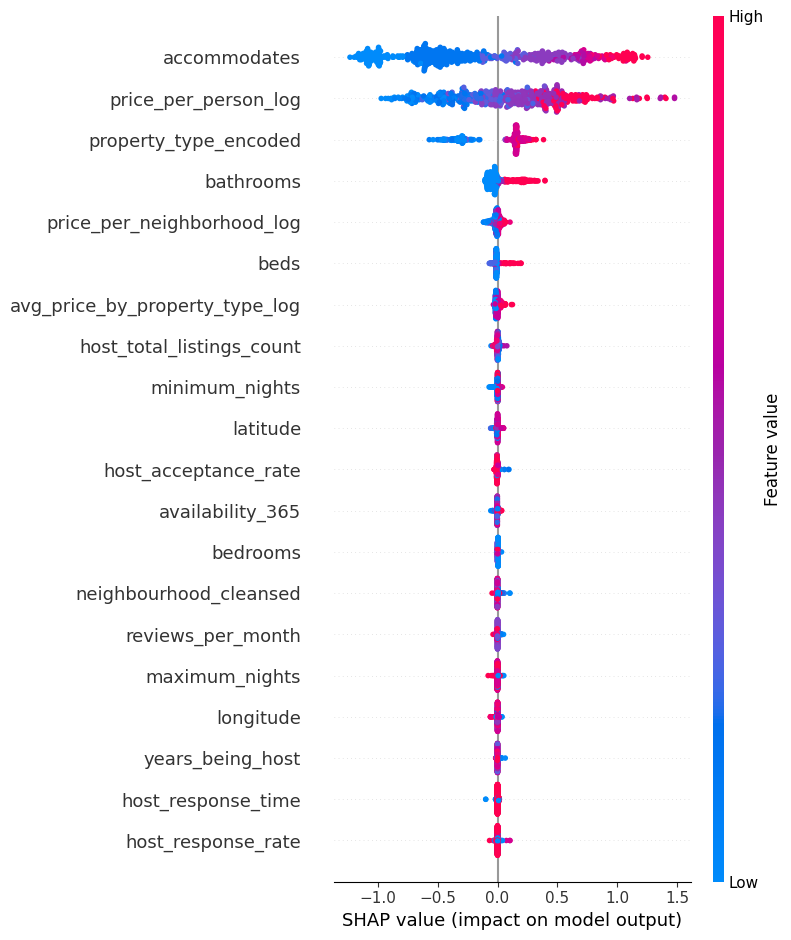

In [ ]:
import shap
import matplotlib.pyplot as plt

# Crear el explicador SHAP para XGBoost
explainer_xgb = shap.Explainer(xgb_model)
shap_values_xgb = explainer_xgb(X_test_tab)

# Gráfico de importancia de características
shap.summary_plot(shap_values_xgb, X_test_tab)


**Características clave SHAP XGBoost:**

1. **accommodates:** tiene un impacto significativo. Los valores más altos tienden a empujar la predicción hacia un valor más alto.

2. **price_per_person_log:** es otra característica con un alto impacto positivo. Los valores más altos en esta característica están fuertemente asociados con precios más altos en la predicción.

3. **property_type_encoded:** también influye, aunque no tan pronunciadamente como las dos anteriores.

4. **bathrooms y price_per_neighborhood_log:** tienen un impacto menos consistente en comparación con otras características, lo que sugiere que no son tan determinantes en la predicción.

### **SHAP en modeo NN**

PermutationExplainer explainer: 623it [01:11,  8.07it/s]


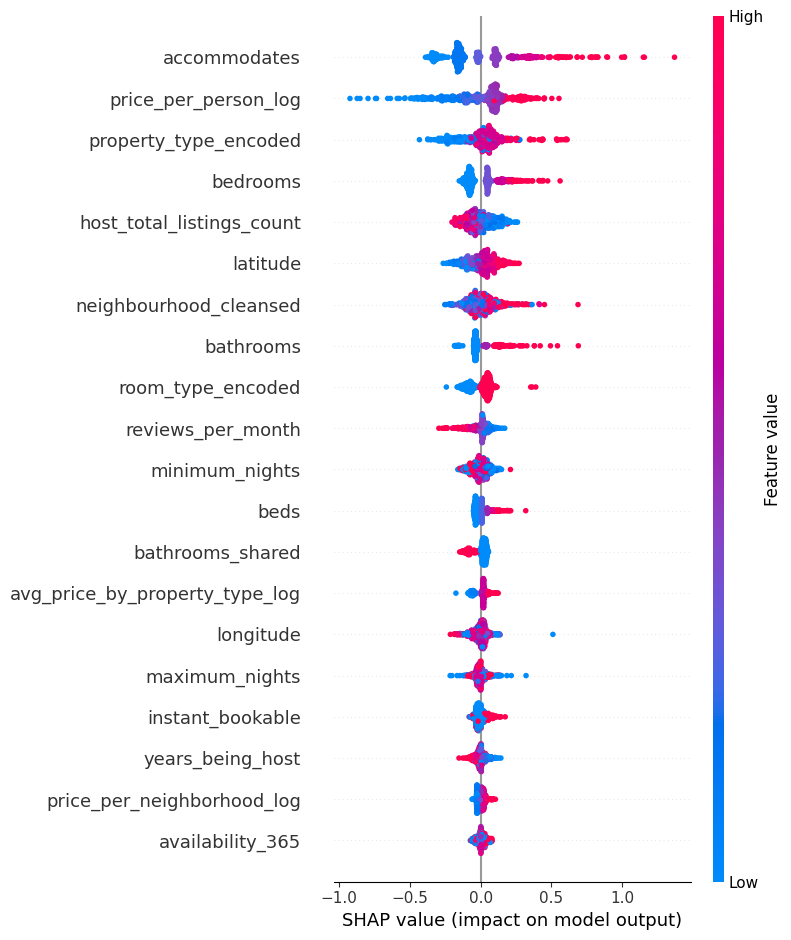

In [ ]:
# Crear el explicador SHAP
explainer_nn = shap.Explainer(modelo_nn, X_test_tab)
shap_values_nn = explainer_nn(X_test_tab)

# importancia  de características para red neuronal
shap.summary_plot(shap_values_nn, X_test_tab)


**Características clave SHAP NN:**

1. accommodates sigue siendo la característica con mayor impacto, seguida de price_per_person_log, property_type_encoded, bedrooms, y host_total_listings_count. Esto sugiere que estos factores están fuertemente relacionados con la predicción de precios.

2. bathrooms_shared y avg_price_by_property_type_log son características relevantes pero con un impacto algo menor, lo que refleja una relación no tan fuerte con la predicción final.

3. availability_365, longitude, y latitude parecen tener un impacto bajo comparado con las características previamente mencionadas.

In [ ]:
# Obtener los coeficientes del meta-modelo Ridge
coef_nn, coef_xgb = meta_model.coef_

# Convertir a porcentaje
total = abs(coef_nn) + abs(coef_xgb)
percent_nn = (abs(coef_nn) / total) * 100
percent_xgb = (abs(coef_xgb) / total) * 100

print(f"\n📊 Influencia de cada modelo en el Stacking:")
print(f"🔹 Red Neuronal: {percent_nn:.2f}%")
print(f"🔹 XGBoost: {percent_xgb:.2f}%")



📊 Influencia de cada modelo en el Stacking:
🔹 Red Neuronal: 3.27%
🔹 XGBoost: 96.73%


Ridge Regression está favoreciendo XGBoost porque su error es menor.

🔹 Solución: Usar un modelo no lineal en el meta-modelo (Random Forest o LightGBM) para permitir más flexibilidad.

# **Reentrenar el meta-modelo Stacking con Random Forest**

In [ ]:
from tensorflow.keras.models import load_model

# Ruta de la mejor red neuronal guardada
nn_model_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_tabular_red1.keras"

# Cargar la mejor red neuronal
modelo_nn = load_model(nn_model_path)

# Confirmar que el modelo cargado es el correcto
modelo_nn.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:713: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 128)                 │           4,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,188 (114.02 KB)

 Trainable params: 14,593 (57.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 14,595 (57.02 KB)

In [ ]:
# Obtener nuevas predicciones con la red neuronal cargada
y_train_pred_nn = modelo_nn.predict(X_train_tab).flatten()
y_val_pred_nn = modelo_nn.predict(X_val_tab).flatten()
y_test_pred_nn = modelo_nn.predict(X_test_tab).flatten()


66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [ ]:
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Crear nuevas features para el meta-modelo (predicciones de NN y XGBoost)
X_meta_train = np.column_stack((y_train_pred_nn, y_train_pred_xgb))
X_meta_val = np.column_stack((y_val_pred_nn, y_val_pred_xgb))
X_meta_test = np.column_stack((y_test_pred_nn, y_test_pred_xgb))

# Entrenar el meta-modelo Random Forest
meta_model_rf = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
meta_model_rf.fit(X_meta_train, y_train_tab)

# Predicciones en test
y_pred_stacking_rf_log = meta_model_rf.predict(X_meta_test)
y_pred_stacking_rf_real = np.exp(y_pred_stacking_rf_log)

# Calcular métricas en test
mae_log, rmse_log, r2_log = calcular_metricas(y_test_tab, y_pred_stacking_rf_log)
mae_real, rmse_real, r2_real = calcular_metricas(y_test_real, y_pred_stacking_rf_real)

# Mostrar resultados
print("\nRESULTADOS DEL MODELO STACKING CON RANDOM FOREST:")
print(f"Test (Log): MAE: {mae_log:.4f}, RMSE: {rmse_log:.4f}, R²: {r2_log:.4f}")
print(f"Test (Original): MAE: {mae_real:.4f}, RMSE: {rmse_real:.4f}, R²: {r2_real:.4f}")



RESULTADOS DEL MODELO STACKING CON RANDOM FOREST:
Test (Log): MAE: 0.0662, RMSE: 0.1439, R²: 0.9567
Test (Original): MAE: 18.8758, RMSE: 66.1001, R²: 0.8348


## **Análisis modelo "meta-modelo Stacking con Random Forest"**

**Test (Log):**

MAE: 0.0662 Error muy bajo, excelente precisión.

RMSE: 0.1439 Errores pequeños, buena dispersión de predicciones.

R²: 0.9567 Explica el 95.67% de la variabilidad, modelo muy preciso.


**Test (Original):**

MAE: 18.8758 Bajo error absoluto en precios reales.

RMSE: 66.1001 Aceptable para predicciones de precios.

R²: 0.8348 Explica el 83.48% de la variabilidad.


In [ ]:
import numpy as np

# Obtener la importancia de cada entrada en el meta-modelo (Random Forest)
feature_importance = meta_model_rf.feature_importances_

# Normalizar los valores para que sumen 100%
total_importance = np.sum(feature_importance)
percent_nn_rf = (feature_importance[0] / total_importance) * 100
percent_xgb_rf = (feature_importance[1] / total_importance) * 100

# Mostrar resultados
print(f"\n📊 Influencia de cada modelo en el Stacking con Random Forest:")
print(f"🔹 Red Neuronal: {percent_nn_rf:.2f}%")
print(f"🔹 XGBoost: {percent_xgb_rf:.2f}%")



📊 Influencia de cada modelo en el Stacking con Random Forest:
🔹 Red Neuronal: 0.01%
🔹 XGBoost: 99.99%


## ⭐ **Usar un Meta-Modelo más flexible (Red Neuronal como Meta-Modelo)**

🔹 Problema: Random Forest sigue favoreciendo XGBoost porque minimiza el error.

🔹 Solución: usar una Red Neuronal como meta-modelo para permitir que la NN tenga más peso.

 Una NN como meta-modelo peude hacer que se aprenda relaciones más complejas entre las predicciones de NN y XGBoost.

🔹 Así evito que la NN sea ignorada y tenga más impacto en el resultado final.

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Definir la Red Neuronal como Meta-Modelo
def build_meta_nn():
    model = keras.Sequential([
        layers.Input(shape=(2,)),  # input predicción de NN y de XGBoost
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='linear')  # output
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])

    return model

# Crear y entrenar el meta-modelo NN
meta_model_nn = build_meta_nn()
meta_model_nn.fit(np.column_stack((y_train_pred_nn, y_train_pred_xgb)), y_train_tab,
                  validation_data=(np.column_stack((y_val_pred_nn, y_val_pred_xgb)), y_val_tab),
                  epochs=50, batch_size=32, verbose=1)

# Hacer predicciones en test con el nuevo meta-modelo NN
y_pred_stacking_nn_log = meta_model_nn.predict(np.column_stack((y_test_pred_nn, y_test_pred_xgb)))
y_pred_stacking_nn_real = np.exp(y_pred_stacking_nn_log)

# Calcular métricas en test
mae_log, rmse_log, r2_log = calcular_metricas(y_test_tab, y_pred_stacking_nn_log)
mae_real, rmse_real, r2_real = calcular_metricas(y_test_real, y_pred_stacking_nn_real)

# Mostrar resultados
print("\nRESULTADOS DEL MODELO STACKING CON RED NEURONAL COMO META-MODELO:")
print(f"Test (Log): MAE: {mae_log:.4f}, RMSE: {rmse_log:.4f}, R²: {r2_log:.4f}")
print(f"Test (Original): MAE: {mae_real:.4f}, RMSE: {rmse_real:.4f}, R²: {r2_real:.4f}")


Epoch 1/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 20.6128 - mae: 4.4610 - val_loss: 11.5373 - val_mae: 3.3495
Epoch 2/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.5298 - mae: 3.0288 - val_loss: 3.1390 - val_mae: 1.7262
Epoch 3/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8815 - mae: 1.2777 - val_loss: 0.1214 - val_mae: 0.2498
Epoch 4/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0496 - mae: 0.1657 - val_loss: 0.0718 - val_mae: 0.1883
Epoch 5/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0327 - mae: 0.1342 - val_loss: 0.0716 - val_mae: 0.1880
Epoch 6/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0320 - mae: 0.1325 - val_loss: 0.0713 - val_mae: 0.1877
Epoch 7/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0301 - mae: 0.1315 - val_loss: 0.0710 - val_mae: 0.1865
Epoch 8/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0317 - mae: 0.1313 - val_loss: 0.0704 - val_mae: 0.1860
Epoch 9/50
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0308 - mae

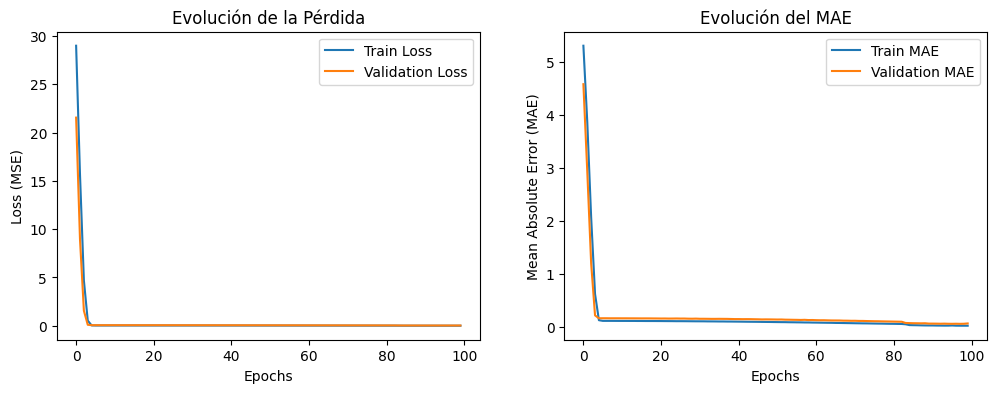

In [ ]:
# Visualizar las métricas de entrenamiento (Loss y MAE)
plt.figure(figsize=(12, 4))

# Pérdida (Loss)
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Evolución de la Pérdida')
plt.legend()

# MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Evolución del MAE')
plt.legend()

plt.show()

## **Análisis Métricas Red Neuronal como Meta-Modelo**


R² en log (0.9555): El modelo es capaz de explicar el 95.55% de la variabilidad en los datos.R² alto sugiere que el modelo generaliza muy bien, con poca varianza entre las predicciones y los valores reales.

R² en escala original (0.8401): Aunque es un valor menor que el de la escala logarítmica, sigue siendo bastante bueno. Esto indica que las predicciones siguen siendo muy precisas en la escala original, con un 84% de varianza explicada.

MAE en log (0.0686) y RMSE en log (0.1459): Son valores muy bajos, lo que indica que el modelo es preciso y que las predicciones son muy cercanas a los valores reales en la escala logarítmica.


**Análisis Loss Red Neuronal como Meta-Modelo:**

El modelo mejora muy rápidamente en las primeras épocas y luego se estabiliza, lo que es una buena señal. Loss reduce significativamente, tanto en train como en va, y se mantiene estable después de cierto punto.

MAE:
E modelo está aprendiendo de manera constante. El error absoluto se reduce rápidamente al principio y se estabiliza posteriormente.

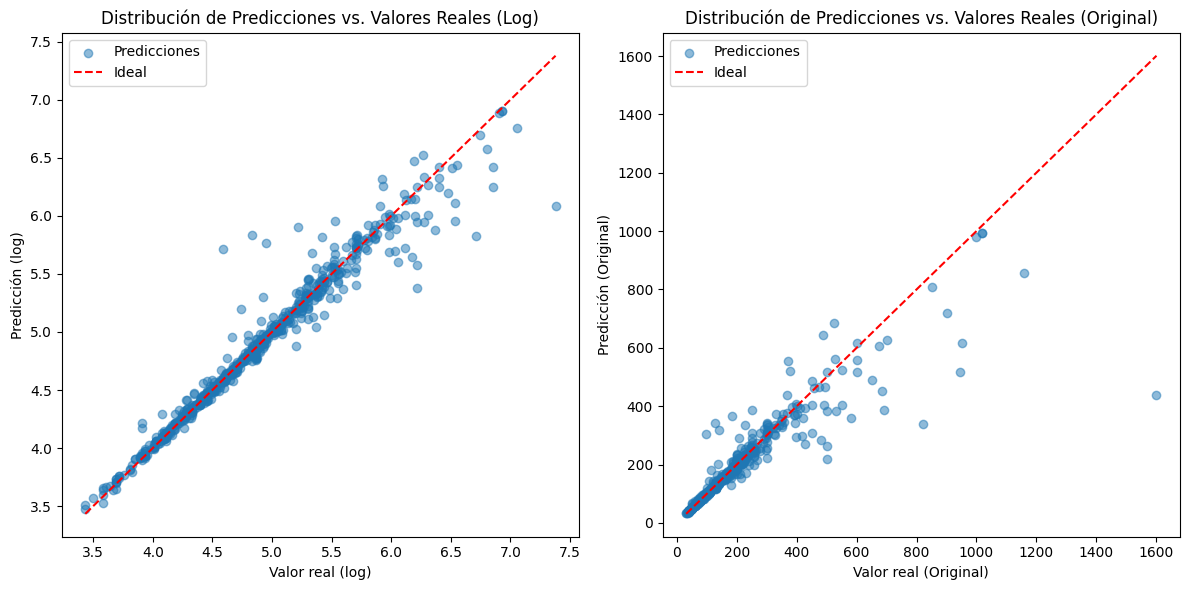

In [ ]:
import matplotlib.pyplot as plt

# Visualización de métricas y distribución de predicciones vs valores reales
plt.figure(figsize=(12, 6))

# Distribución en escala log
plt.subplot(1, 2, 1)
plt.scatter(y_test_tab, y_pred_stacking_nn_log, alpha=0.5, label="Predicciones")
plt.plot([min(y_test_tab), max(y_test_tab)], [min(y_test_tab), max(y_test_tab)], 'r', linestyle="--", label="Ideal")  # Línea ideal
plt.xlabel("Valor real (log)")
plt.ylabel("Predicción (log)")
plt.title("Distribución de Predicciones vs. Valores Reales (Log)")
plt.legend()

# Distribución en escala original
plt.subplot(1, 2, 2)
plt.scatter(y_test_real, y_pred_stacking_nn_real, alpha=0.5, label="Predicciones")
plt.plot([min(y_test_real), max(y_test_real)], [min(y_test_real), max(y_test_real)], 'r', linestyle="--", label="Ideal")  # Línea ideal
plt.xlabel("Valor real (Original)")
plt.ylabel("Predicción (Original)")
plt.title("Distribución de Predicciones vs. Valores Reales (Original)")
plt.legend()

plt.tight_layout()
plt.show()


## **Análisis predicciones vs. valores reales (Log y Original) Red Neuronal como Meta-Modelo**

**Distribución Logarítmica:**

Las predicciones se ajustan muy bien a la línea ideal, el modelo está prediciendo con bastante precisión en la escala logarítmica.

La dispersión es mínima, lo cual sugiere una alta exactitud en las predicciones.


**Distribución Original:**

Las predicciones siguen estando bien alineadas con los valores reales.

Hay más dispersión de los puntos en la escala original, pero no es algo preocupante.


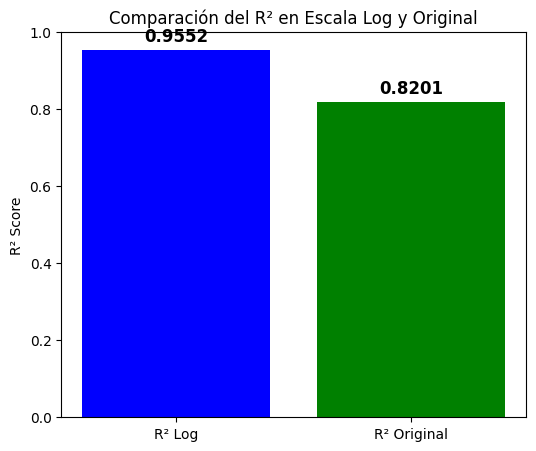

In [ ]:
import numpy as np

# Crear una barra con los valores de R²
labels = ["R² Log", "R² Original"]
values = [r2_log, r2_real]

plt.figure(figsize=(6, 5))
plt.bar(labels, values, color=['blue', 'green'])
plt.ylim(0, 1)  # Escalar entre 0 y 1 para comparar mejor
plt.ylabel("R² Score")
plt.title("Comparación del R² en Escala Log y Original")

# Mostrar valores en las barras
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.4f}", ha='center', fontsize=12, fontweight='bold')

plt.show()


In [ ]:
# Ruta donde se guardará el modelo Stacking con NN como meta-modelo
stacking_nn_model_path = "/content/drive/MyDrive/Deep_Learning_2024/Notebooks/models/modelo_stacking_nn.keras"

# Guardar el modelo
meta_model_nn.save(stacking_nn_model_path)

print("✅ Modelo Stacking con Red Neuronal como meta-modelo guardado exitosamente.")


✅ Modelo Stacking con Red Neuronal como meta-modelo guardado exitosamente.


# **Stacking con Red Neuronal Profunda como Meta-Modelo:**

In [ ]:
from tensorflow.keras.layers import BatchNormalization, Dropout


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers

# Definir la Red Neuronal más profunda como Meta-Modelo
def build_deep_meta_nn():
    model = keras.Sequential([
        layers.Input(shape=(2,)),  # Dos entradas: predicción de NN y de XGBoost
        layers.Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        layers.Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        layers.Dense(16, activation='relu'),
        layers.Dense(8, activation='relu'),
        layers.Dense(1, activation='linear')  # Salida para predecir el precio en log
    ])

    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss='mse',
                  metrics=['mae'])

    return model

# Crear y entrenar el nuevo meta-modelo NN más profunda
meta_model_deep_nn = build_deep_meta_nn()
meta_model_deep_nn.fit(np.column_stack((y_train_pred_nn, y_train_pred_xgb)), y_train_tab,
                        validation_data=(np.column_stack((y_val_pred_nn, y_val_pred_xgb)), y_val_tab),
                        epochs=100, batch_size=32, verbose=1)

# Hacer predicciones en test con la NN más profunda como meta-modelo
y_pred_stacking_deep_nn_log = meta_model_deep_nn.predict(np.column_stack((y_test_pred_nn, y_test_pred_xgb)))
y_pred_stacking_deep_nn_real = np.exp(y_pred_stacking_deep_nn_log)

# Calcular métricas en test
mae_log, rmse_log, r2_log = calcular_metricas(y_test_tab, y_pred_stacking_deep_nn_log)
mae_real, rmse_real, r2_real = calcular_metricas(y_test_real, y_pred_stacking_deep_nn_real)

# Mostrar resultados
print("\nRESULTADOS DEL MODELO STACKING CON RED NEURONAL PROFUNDA COMO META-MODELO:")
print(f"Test (Log): MAE: {mae_log:.4f}, RMSE: {rmse_log:.4f}, R²: {r2_log:.4f}")
print(f"Test (Original): MAE: {mae_real:.4f}, RMSE: {rmse_real:.4f}, R²: {r2_real:.4f}")


Epoch 1/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 29.6072 - mae: 5.2888 - val_loss: 5.5952 - val_mae: 2.3421
Epoch 2/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7.3197 - mae: 2.3957 - val_loss: 1.1880 - val_mae: 1.0614
Epoch 3/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.3927 - mae: 1.2462 - val_loss: 0.5099 - val_mae: 0.5761
Epoch 4/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2634 - mae: 0.8881 - val_loss: 0.3438 - val_mae: 0.4554
Epoch 5/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8453 - mae: 0.7314 - val_loss: 0.2119 - val_mae: 0.3549
Epoch 6/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8346 - mae: 0.7168 - val_loss: 0.1332 - val_mae: 0.2533
Epoch 7/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7493 - mae: 0.6826 - val_loss: 0.0960 - val_mae: 0.2101
Epoch 8/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7654 - mae: 0.6872 - val_loss: 0.1125 - val_mae: 0.2490
Epoch 9/100
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.63

## **Análisis Métricas Red Neuronal como Meta-Modelo**

**Resultados del Test (Log):**

MAE: 0.0952 Bajo error absoluto, buena precisión en escala logarítmica.

RMSE: 0.1616 Errores moderados, aún buen desempeño.

R²: 0.9454 Explica el 94.54% de la variabilidad.


**Resultados del Test (Original):**

MAE: 24.1224 Error aceptable en la escala de precios reales.

RMSE: 75.5814 Bueno, pero algo mayor comparado con otros modelos

R²: 0.7841 Explica el 78.41% de la variabilidad.

In [ ]:
import numpy as np

# Obtener los pesos de la capa de entrada de la NN meta-modelo
input_weights = meta_model_deep_nn.layers[0].get_weights()[0]

# Normalizar los valores para que sumen 100%
total_importance = np.sum(np.abs(input_weights))
percent_nn = (np.abs(input_weights[0, 0]) / total_importance) * 100
percent_xgb = (np.abs(input_weights[1, 0]) / total_importance) * 100

# Mostrar resultados
print(f"\n📊 Influencia de cada modelo en el Stacking con Red Neuronal Profunda como Meta-Modelo:")
print(f"🔹 Red Neuronal: {percent_nn:.2f}%")
print(f"🔹 XGBoost: {percent_xgb:.2f}%")



📊 Influencia de cada modelo en el Stacking con Red Neuronal Profunda como Meta-Modelo:
🔹 Red Neuronal: 0.37%
🔹 XGBoost: 0.85%


# **Mejores modelos**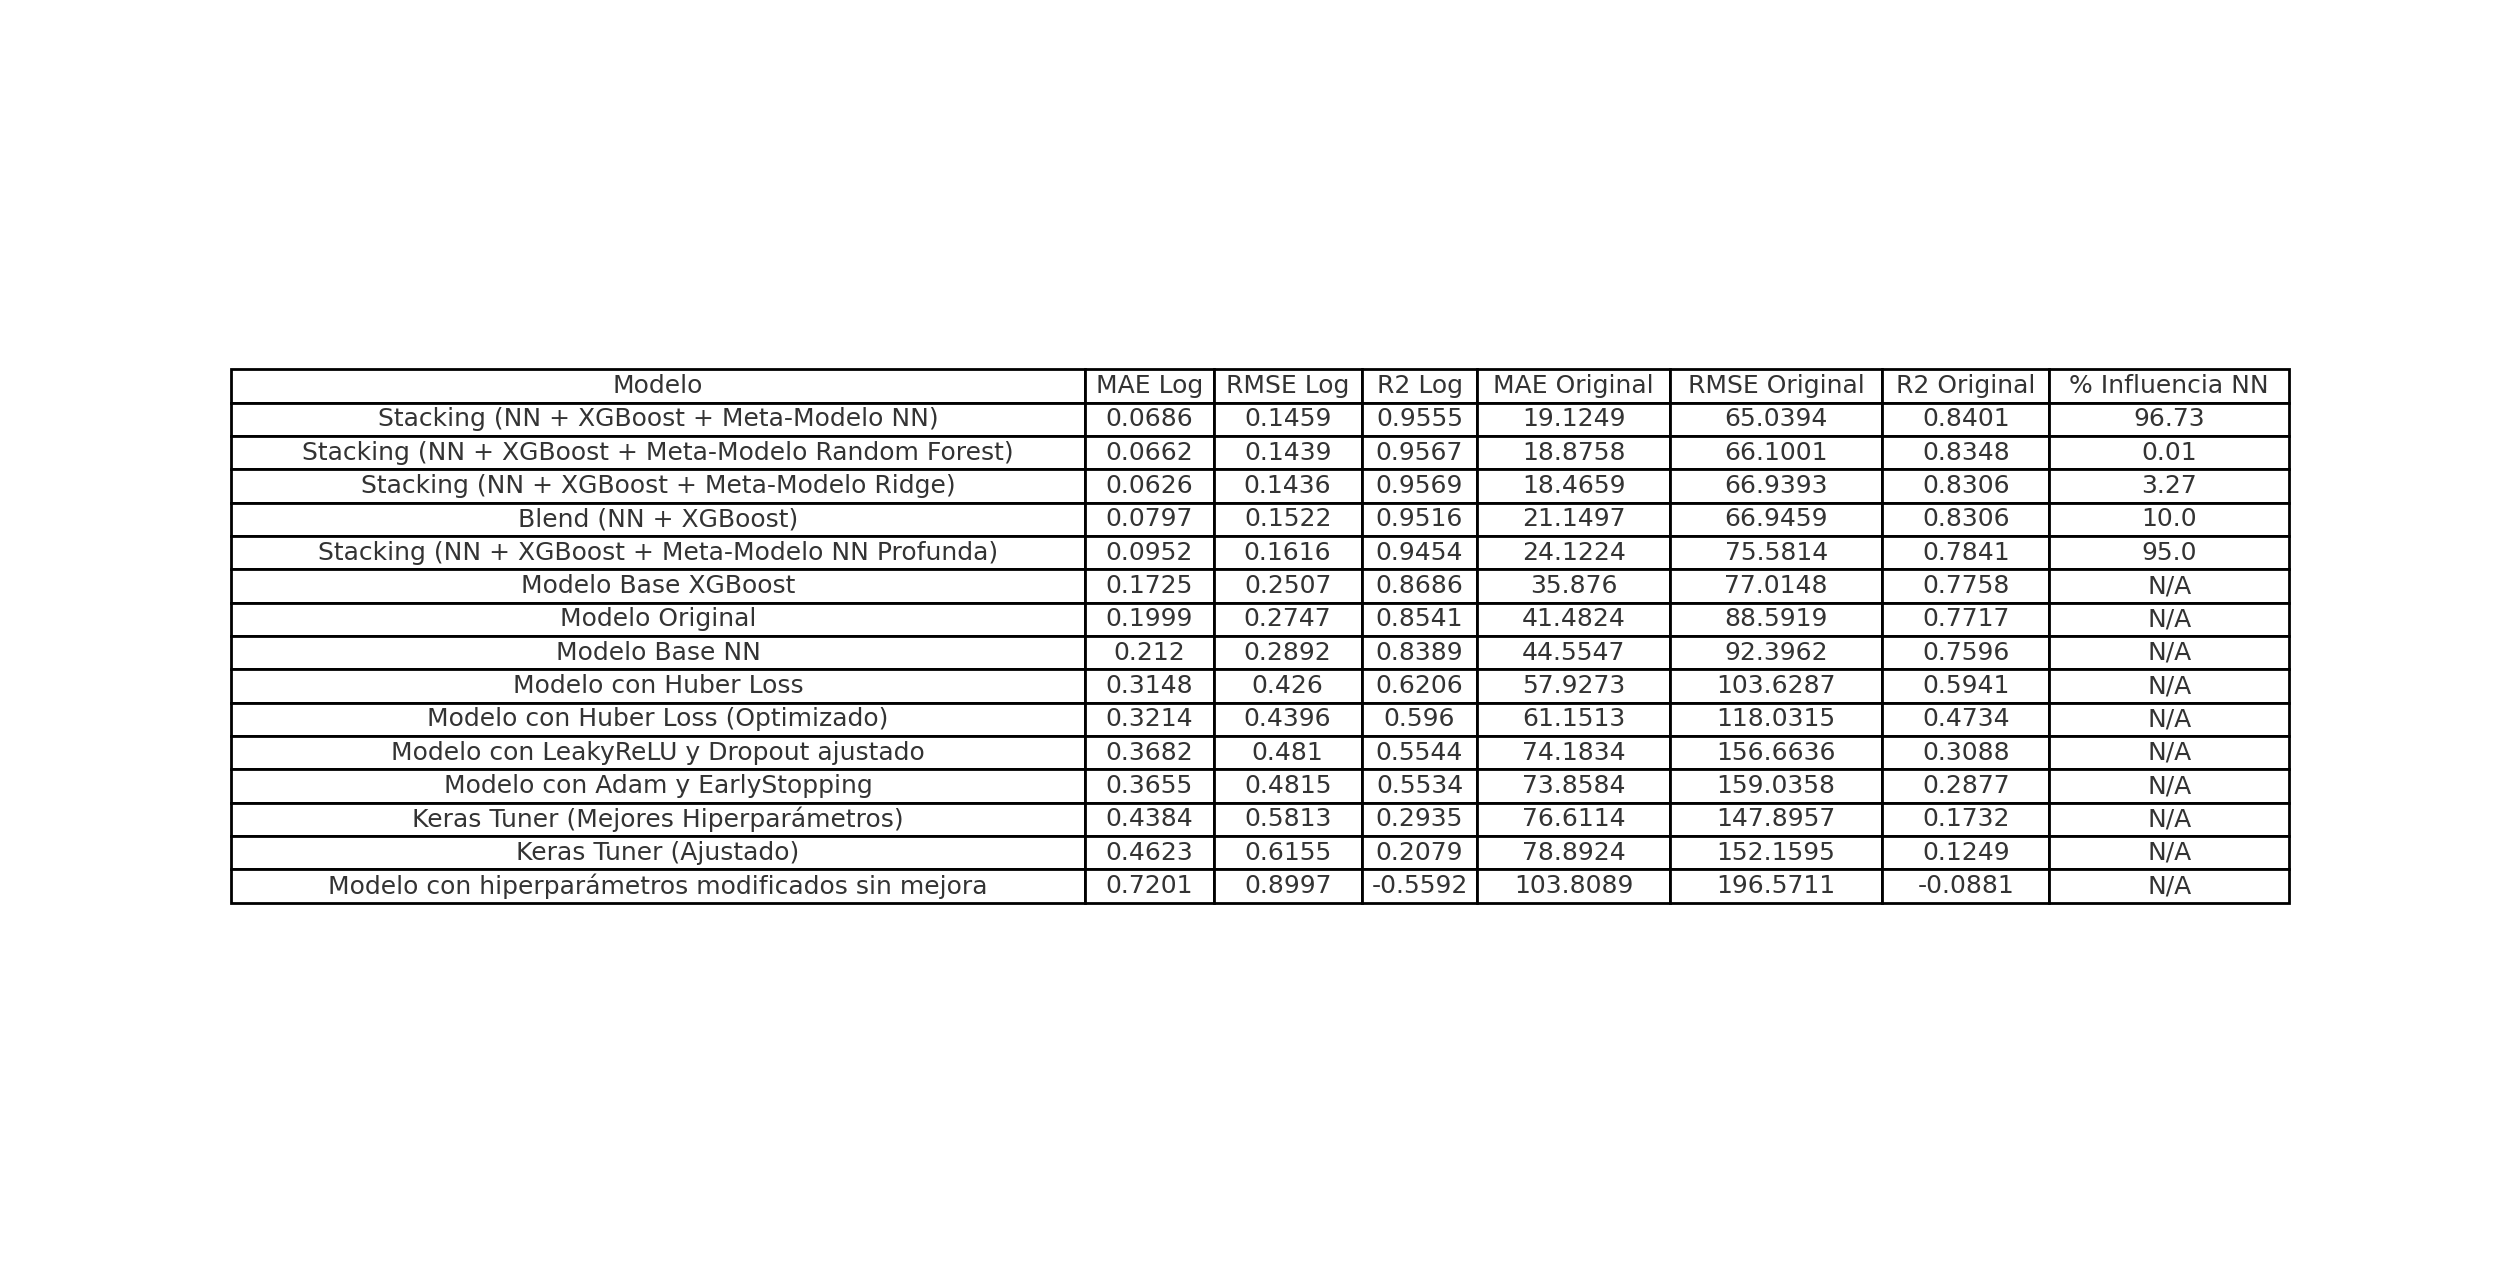

✅ **Red 1- primer modelo-original - Arquitectura simple:**

Tres capas densas (Dense) con ReLU y Dropout (0.3) para evitar sobreajuste sin complicar el modelo.

Val
        "Modelo": "Modelo Original",
        "MAE Log": 0.1999, "RMSE Log": 0.2747, "R2 Log": 0.8541,
        "MAE Original": 41.4824, "RMSE Original": 88.5919, "R2 Original": 0.7717

Test
        "Modelo": "Modelo Base NN",
        "MAE Log": 0.2120, "RMSE Log": 0.2892, "R2 Log": 0.8389,
        "MAE Original": 44.5547, "RMSE Original": 92.3962, "R2 Original": 0.7596



✅ **Stacking (NN + XGBoost + Meta-Modelo NN)**

La NN en sí misma no fue tan fuerte como modelo base, pero cuando la usé como meta-modelo, su influencia subió porque era la encargada de hacer la predicción final.

En los modelos donde la NN es el meta-modelo, se observó que en la combinación final, la NN pesaba alrededor de 95%-96% en la predicción final, mientras que XGBoost o Random Forest tenían un peso mucho menor.

En otros modelos de Stacking donde la NN no era el meta-modelo cuando usé Ridge o Random Forest como Meta-Modelo, la NN tenía un peso muy bajo (3.27% o 0.01%) porque XGBoost dominaba la predicción.